In [1]:
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import boost_histogram as bh
import simweights
import scipy as scp
path='/net/big-tank/POOL/users/pgutjahr/data/data/leading_muons/evaluation_01/Corsika_evaluated'
f1=h5py.File('/net/big-tank/POOL/users/pgutjahr/data/data/leading_muons/evaluation_01/Corsika_evaluated/30011/level2/00000-00999/Corsika_30011_level2_00000010.hdf5','r')
files=glob.glob('/net/big-tank/POOL/projects/icecube/prompt_muons/evaluated_dnn_many/Corsika/3001*/level2/00000-00999/*')
files2=glob.glob('/net/big-tank/POOL/projects/icecube/prompt_muons/evaluated_dnn_manyV2/dnn_manyV2/Corsika/3001*/level2/00000-00999/*')
f2=h5py.File('/net/big-tank/POOL/projects/icecube/prompt_muons/evaluated_dnn_many/Corsika/30011/level2/00000-00999/Corsika_30011_level2_00000010.hdf5')
f3=h5py.File('/net/big-tank/POOL/projects/icecube/prompt_muons/evaluated_dnn_manyV2/dnn_manyV2/Corsika/30011/level2/00000-00999/Corsika_30011_level2_00000010.hdf5')


In [2]:
for key in f3.keys():
    print(key)

CorsikaWeightMap
DeepLearningReco_PromtMu_L2_direction
DeepLearningReco_PromtMu_L2_direction_I3Particle
DeepLearningReco_direction_big
DeepLearningReco_direction_big_I3Particle
DeepLearningReco_direction_bigger_conv
DeepLearningReco_direction_bigger_conv_2
DeepLearningReco_direction_bigger_conv_2_I3Particle
DeepLearningReco_direction_bigger_conv_I3Particle
DeepLearningReco_direction_even_bigger
DeepLearningReco_direction_even_bigger_I3Particle
DeepLearningReco_direction_smaller_conv
DeepLearningReco_direction_smaller_conv_I3Particle
DeepLearningReco_energy_bigger_convolutional
DeepLearningReco_energy_bigger_convolutional_I3Particle
DeepLearningReco_energy_bigger_convolutional_max
DeepLearningReco_energy_bigger_convolutional_max_I3Particle
DeepLearningReco_energy_bigger_model
DeepLearningReco_energy_bigger_model_I3Particle
DeepLearningReco_energy_num_muons
DeepLearningReco_energy_num_muons_I3Particle
DeepLearningReco_energy_small_bias
DeepLearningReco_energy_small_bias_I3Particle
DeepLe

In [3]:
for key in f2.keys():
    print(key)

CorsikaWeightMap
DeepLearningReco_PromtMu_L2_direction
DeepLearningReco_PromtMu_L2_direction_I3Particle
DeepLearningReco_direction_big
DeepLearningReco_direction_big_I3Particle
DeepLearningReco_direction_bigger_conv
DeepLearningReco_direction_bigger_conv_2
DeepLearningReco_direction_bigger_conv_2_I3Particle
DeepLearningReco_direction_bigger_conv_I3Particle
DeepLearningReco_direction_even_bigger
DeepLearningReco_direction_even_bigger_I3Particle
DeepLearningReco_energy_bigger_model
DeepLearningReco_energy_bigger_model_I3Particle
DeepLearningReco_energy_smaller_model
DeepLearningReco_energy_smaller_model_I3Particle
DeepLearningReco_exported_model_PromptMu_L2_energy
DeepLearningReco_exported_model_PromptMu_L2_energy_I3Particle
FilterMask
HitStatistics_SplitInIceDSTPulses
I3EventHeader
MCLabelsLeadingMuons
MCLabelsMostEnergeticMuonParentInfo
MCPrimary
MPEFit
MPEFitCharacteristics
MPEFitFitParams
MPEFitMuEX
MostEnergeticMuonInside
PolyplopiaPrimary
QFilterMask
SPEFit2
__I3Index__
weights
wei

In [4]:
f2['weights'][:]

array([(300110010,   2, 0, 0, 1, 1.62424061e-14, 3.94057988e-14, 3.94057988e-14, 1.22900801e-23, 8.78748062e-14, 6.67400275e-14, 4.15632451e-16, 4.15632451e-16, 4.15632451e-16, 2.93198008e-13, 1.89683957e-13),
       (300110010,   4, 0, 0, 1, 3.35811036e-10, 3.57642307e-10, 3.57642307e-10, 2.89982428e-10, 2.56292375e-10, 4.40783208e-10, 2.73580398e-10, 2.73580398e-10, 2.73580398e-10, 3.46143327e-10, 5.22916363e-10),
       (300110010,   6, 0, 0, 1, 2.37896531e-12, 3.08935137e-12, 3.08935137e-12, 5.94821309e-13, 2.45656424e-12, 4.92743150e-12, 8.98302562e-13, 8.98302562e-13, 8.98302562e-13, 9.81959417e-12, 1.15233144e-11),
       (300110010,  11, 0, 0, 1, 8.28421232e-11, 9.01236221e-11, 9.01236221e-11, 6.57165333e-11, 7.28877275e-11, 1.23383686e-10, 6.48761670e-11, 6.48761670e-11, 6.48761670e-11, 1.09947653e-10, 1.67214881e-10),
       (300110010,  14, 0, 0, 1, 9.62167788e-14, 1.68162655e-13, 1.68162655e-13, 5.92300412e-18, 2.35297662e-13, 2.55656675e-13, 5.44039925e-15, 5.44039925e-15,

In [5]:
np.mean(f1['DeepLearningReco_exported_model_PromptMu_L2_energy']['runtime_prediction'])

0.010184835818890705

In [6]:
def add_simweights(df: pd.DataFrame, model_class: list[simweights._fluxes.CosmicRayFlux] | simweights._fluxes.CosmicRayFlux):
    """ Adds weights for all primary models in model_class (from simweights._fluxes) to the df.
        The key will be "simweights_{name of model_class}" for each model. 
    """
    
    if not isinstance(model_class, list):
        model_class = [model_class]
    
    df['simweights_GaisserH3a']=np.empty(len(df))
    #for primary_model in model_class:   
        #df['simweights_'+primary_model.__name__] = np.empty(len(df))

    weight_keys = [
        "CylinderLength",
        "CylinderRadius",
        "EnergyPrimaryMax",
        "EnergyPrimaryMin",
        "NEvents",
        "OverSampling",
        "ParticleType",
        "PrimaryEnergy",
        "PrimarySpectralIndex",
        "PrimaryType",
        "ThetaMax",
        "ThetaMin",
        "Weight",
    ]

    # loop through different files
    e_low = np.unique(df.EnergyPrimaryMin)

    for e_l in e_low:
        mask = df.EnergyPrimaryMin == e_l
        print(f'minimum primary energy: {e_l} GeV')
        number_corsika_files = len(np.unique(df.Run[mask]))
        print('number of processed files: ', number_corsika_files)

        CorsikaWeightMap: dict = {k: [df[k][mask]] for k in weight_keys}
        PolyplopiaPrimary: dict = {k: [df[k][mask]] for k in ["type", "energy", "zenith"]}


        fobj = {"CorsikaWeightMap": CorsikaWeightMap, "PolyplopiaPrimary": PolyplopiaPrimary}
        wobj = simweights.CorsikaWeighter(fobj, nfiles=number_corsika_files)

        for primary_model in model_class:   
            df.loc[mask, 'simweights_GaisserH3a'] = wobj.get_weights(primary_model)


In [7]:
def add_simweights(df: pd.DataFrame, model_class: list[simweights._fluxes.CosmicRayFlux] | simweights._fluxes.CosmicRayFlux):
    """ Adds weights for all primary models in model_class (from simweights._fluxes) to the df.
        The key will be "simweights_{name of model_class}" for each model. 
    """
    
    if not isinstance(model_class, list):
        model_class = [model_class]
    

    for primary_model in model_class:   
        df['simweights_'+primary_model.__name__] = np.empty(len(df))

    weight_keys = [
        "CylinderLength",
        "CylinderRadius",
        "EnergyPrimaryMax",
        "EnergyPrimaryMin",
        "NEvents",
        "OverSampling",
        "ParticleType",
        "PrimaryEnergy",
        "PrimarySpectralIndex",
        "PrimaryType",
        "ThetaMax",
        "ThetaMin",
        "Weight",
    ]

    # loop through different files
    e_low = np.unique(df.EnergyPrimaryMin)

    for e_l in e_low:
        mask = df.EnergyPrimaryMin == e_l
        print(f'minimum primary energy: {e_l} GeV')
        number_corsika_files = len(np.unique(df.Run[mask]))
        print('number of processed files: ', number_corsika_files)

        CorsikaWeightMap: dict = {k: [df[k][mask]] for k in weight_keys}
        PolyplopiaPrimary: dict = {k: [df[k][mask]] for k in ["type", "energy", "zenith"]}


        fobj = {"CorsikaWeightMap": CorsikaWeightMap, "PolyplopiaPrimary": PolyplopiaPrimary}
        wobj = simweights.CorsikaWeighter(fobj, nfiles=number_corsika_files)

        for primary_model in model_class:   
            df.loc[mask, 'simweights_'+primary_model.__name__] = wobj.get_weights(primary_model())


In [8]:
def RMSE(x,y):
    x=x[np.isfinite(y)]
    y=y[np.isfinite(y)]
    return np.sqrt(np.mean((x-y)**2))

In [9]:
def under_5(x):
    return np.quantile(x,0.05)
def over_5(x):
    return np.quantile(x,0.95)

In [10]:
RMSE_entry_energy=RMSE(np.log(f1['DeepLearningReco_exported_model_PromptMu_L2_energy']['entry_energy']), np.log(f1['MCLabelsLeadingMuons']['entry_energy']))
RMSE_bundle_energy_at_entry=RMSE(np.log(f1['DeepLearningReco_exported_model_PromptMu_L2_energy']['bundle_energy_at_entry']), np.log(f1['MCLabelsLeadingMuons']['bundle_energy_at_entry']))
print(RMSE_entry_energy)
RMSE_bundle_energy_at_entry

0.7393084496354628


0.4461658787485916

In [11]:
groß=(f1['DeepLearningReco_exported_model_PromptMu_L2_energy']['leading_energy_rel_entry'][f1['DeepLearningReco_exported_model_PromptMu_L2_energy']['leading_energy_rel_entry']>=1])
groß

array([1.00626934])

In [12]:
CorsikaWeightMap=pd.DataFrame([])
for file in files:
    df_poly=pd.read_hdf(file,key='PolyplopiaPrimary')
    df_poly=pd.concat([df_poly,pd.read_hdf(file,key='CorsikaWeightMap')],axis=1)
    CorsikaWeightMap=pd.concat([CorsikaWeightMap,df_poly])

In [13]:
CorsikaWeightMap

Run  Event  SubEvent  SubEventStream  exists              x   
0    300130021      0         0               0       1  191174.055279  \
1    300130021      1         0               0       1 -309419.061699   
2    300130021      2         0               0       1  117988.892195   
3    300130021      3         0               0       1 -458675.219010   
4    300130021      4         0               0       1   38194.089968   
..         ...    ...       ...             ...     ...            ...   
477  300110164    987         0               0       1  -62202.210589   
478  300110164    988         0               0       1  234698.455721   
479  300110164    989         0               0       1   53999.394600   
480  300110164    990         0               0       1  -53960.340574   
481  300110164    993         0               0       1   45288.483272   

                 y              z          time    zenith  ...  OverSampling   
0    -16310.724071  109134.840204 -7.267461e+05  1.056710  ...           1.0  \
1    164026.491526  102836.969422 -1.206657e+06  1.284637  ...           1.0   
2    113194.316088  109900.605492 -6.468647e+05  0.981716  ...           1.0   
3   -158797.551145   94518.832298 -1.638608e+06  1.378116  ...           1.0   
4    148957.897007  110157.581279 -6.197999e+05  0.948627  ...           1.0   
..             ...            ...           ...       ...  ...           ...   
477  368359.463148  101594.885592 -1.280343e+06  1.304683  ...           1.0   
478 -166052.979279  105839.041869 -1.011342e+06  1.216115  ...           1.0   
479 -152672.779678  109966.761019 -6.412563e+05  0.973668  ...           1.0   
480   31645.819076  111624.101851 -4.149540e+05  0.509560  ...           1.0   
481   48151.159254  111588.975936 -4.207517e+05  0.534427  ...           1.0   

     ParticleType  Polygonato  PrimaryEnergy  PrimarySpectralIndex   
0    2.212000e+03         1.0   2.019921e+10                  -1.0  \
1    2.212000e+03         1.0   1.370390e+09                  -1.0   
2    2.212000e+03         1.0   1.030500e+10                  -1.0   
3    2.212000e+03         1.0   1.080885e+09                  -1.0   
4    2.212000e+03         1.0   1.962235e+09                  -1.0   
..            ...         ...            ...                   ...   
477  1.000261e+09         1.0   1.233180e+07                  -1.0   
478  1.000261e+09         1.0   4.631764e+07                  -1.0   
479  1.000261e+09         1.0   2.751538e+07                  -1.0   
480  1.000261e+09         1.0   1.614127e+06                  -1.0   
481  1.000261e+09         1.0   9.510954e+07                  -1.0   

      PrimaryType  ThetaMax  ThetaMin      TimeScale  Weight  
0    2.212000e+03  1.570622       0.0  137773.604046     1.0  
1    2.212000e+03  1.570622       0.0  137773.604046     1.0  
2    2.212000e+03  1.570622       0.0  137773.604046     1.0  
3    2.212000e+03  1.570622       0.0  137773.604046     1.0  
4    2.212000e+03  1.570622       0.0  137773.604046     1.0  
..            ...       ...       ...            ...     ...  
477  1.000261e+09  1.570622       0.0      10.556887     1.0  
478  1.000261e+09  1.570622       0.0      10.556887     1.0  
479  1.000261e+09  1.570622       0.0      10.556887     1.0  
480  1.000261e+09  1.570622       0.0      10.556887     1.0  
481  1.000261e+09  1.570622       0.0      10.556887     1.0  

[194937 rows x 43 columns]

In [14]:
add_simweights(CorsikaWeightMap, [simweights.GaisserH3a, simweights.GlobalFitGST, simweights.GlobalSplineFit5Comp])
#flux=simweights.GaisserH4a()
#weights=weighter.get
CorsikaWeightMap

minimum primary energy: 600.0 GeV
number of processed files:  200
minimum primary energy: 1000000.0 GeV
number of processed files:  200
minimum primary energy: 100000000.0 GeV
number of processed files:  997
minimum primary energy: 1000000000.0 GeV
number of processed files:  40


Run  Event  SubEvent  SubEventStream  exists              x   
0    300130021      0         0               0       1  191174.055279  \
1    300130021      1         0               0       1 -309419.061699   
2    300130021      2         0               0       1  117988.892195   
3    300130021      3         0               0       1 -458675.219010   
4    300130021      4         0               0       1   38194.089968   
..         ...    ...       ...             ...     ...            ...   
477  300110164    987         0               0       1  -62202.210589   
478  300110164    988         0               0       1  234698.455721   
479  300110164    989         0               0       1   53999.394600   
480  300110164    990         0               0       1  -53960.340574   
481  300110164    993         0               0       1   45288.483272   

                 y              z          time    zenith  ...  PrimaryEnergy   
0    -16310.724071  109134.840204 -7.267461e+05  1.056710  ...   2.019921e+10  \
1    164026.491526  102836.969422 -1.206657e+06  1.284637  ...   1.370390e+09   
2    113194.316088  109900.605492 -6.468647e+05  0.981716  ...   1.030500e+10   
3   -158797.551145   94518.832298 -1.638608e+06  1.378116  ...   1.080885e+09   
4    148957.897007  110157.581279 -6.197999e+05  0.948627  ...   1.962235e+09   
..             ...            ...           ...       ...  ...            ...   
477  368359.463148  101594.885592 -1.280343e+06  1.304683  ...   1.233180e+07   
478 -166052.979279  105839.041869 -1.011342e+06  1.216115  ...   4.631764e+07   
479 -152672.779678  109966.761019 -6.412563e+05  0.973668  ...   2.751538e+07   
480   31645.819076  111624.101851 -4.149540e+05  0.509560  ...   1.614127e+06   
481   48151.159254  111588.975936 -4.207517e+05  0.534427  ...   9.510954e+07   

     PrimarySpectralIndex   PrimaryType  ThetaMax  ThetaMin      TimeScale   
0                    -1.0  2.212000e+03  1.570622       0.0  137773.604046  \
1                    -1.0  2.212000e+03  1.570622       0.0  137773.604046   
2                    -1.0  2.212000e+03  1.570622       0.0  137773.604046   
3                    -1.0  2.212000e+03  1.570622       0.0  137773.604046   
4                    -1.0  2.212000e+03  1.570622       0.0  137773.604046   
..                    ...           ...       ...       ...            ...   
477                  -1.0  1.000261e+09  1.570622       0.0      10.556887   
478                  -1.0  1.000261e+09  1.570622       0.0      10.556887   
479                  -1.0  1.000261e+09  1.570622       0.0      10.556887   
480                  -1.0  1.000261e+09  1.570622       0.0      10.556887   
481                  -1.0  1.000261e+09  1.570622       0.0      10.556887   

     Weight  simweights_GaisserH3a  simweights_GlobalFitGST   
0       1.0           5.442637e-14             1.948442e-15  \
1       1.0           2.886167e-08             1.643490e-07   
2       1.0           1.965672e-11             1.009890e-11   
3       1.0           4.650255e-08             2.862681e-07   
4       1.0           1.298775e-08             6.306347e-08   
..      ...                    ...                      ...   
477     1.0           3.527161e-05             3.629130e-05   
478     1.0           3.524559e-06             4.845582e-06   
479     1.0           8.981565e-06             1.082578e-05   
480     1.0           9.626007e-04             1.970973e-03   
481     1.0           8.796627e-07             1.290967e-06   

     simweights_GlobalSplineFit5Comp  
0                       2.047872e-10  
1                       1.390307e-07  
2                       7.515287e-10  
3                       2.118190e-07  
4                       7.025647e-08  
..                               ...  
477                     1.030947e-05  
478                     1.043784e-06  
479                     2.546641e-06  
480                     4.575152e-04  
481                     2.

In [15]:
CorsikaWeightMap.keys()

Index(['Run', 'Event', 'SubEvent', 'SubEventStream', 'exists', 'x', 'y', 'z',
       'time', 'zenith', 'azimuth', 'energy', 'speed', 'length',
       'pdg_encoding', 'type', 'shape', 'location', 'fit_status', 'Run',
       'Event', 'SubEvent', 'SubEventStream', 'exists', 'AreaSum',
       'Atmosphere', 'CylinderLength', 'CylinderRadius', 'EnergyPrimaryMax',
       'EnergyPrimaryMin', 'FluxSum', 'GeneratorID', 'NEvents', 'OverSampling',
       'ParticleType', 'Polygonato', 'PrimaryEnergy', 'PrimarySpectralIndex',
       'PrimaryType', 'ThetaMax', 'ThetaMin', 'TimeScale', 'Weight',
       'simweights_GaisserH3a', 'simweights_GlobalFitGST',
       'simweights_GlobalSplineFit5Comp'],
      dtype='object')

In [16]:
df_MCLabelsLeading=pd.DataFrame([])
df_DNN_energy=pd.DataFrame([])
df_MCLabelsParent=pd.DataFrame([])
df_weights=pd.DataFrame([])
df_DNN_energy_m=pd.DataFrame([])
df_DNN_energy_b=pd.DataFrame([])
df_energy_MuEX=pd.DataFrame([])
df_direction=pd.DataFrame([])
for file in files:
    df1=pd.read_hdf(file,key='MCLabelsLeadingMuons')
    df2=pd.read_hdf(file,key='DeepLearningReco_energy_smaller_model')
    df3=pd.read_hdf(file,key='MCLabelsMostEnergeticMuonParentInfo')
    df4=pd.read_hdf(file,key='weights')
    df5=pd.read_hdf(file,key='DeepLearningReco_exported_model_PromptMu_L2_energy')
    df6=pd.read_hdf(file,key='DeepLearningReco_energy_bigger_model')
    df7=pd.read_hdf(file,key='MPEFitMuEX')
    df_MCLabelsLeading=pd.concat([df_MCLabelsLeading,df1])
    df_DNN_energy=pd.concat([df_DNN_energy,df2])
    df_MCLabelsParent=pd.concat([df_MCLabelsParent,df3])
    df_weights=pd.concat([df_weights,df4])
    df_DNN_energy_m=pd.concat([df_DNN_energy_m,df5])
    df_DNN_energy_b=pd.concat([df_DNN_energy_b,df6])
    df_energy_MuEX=pd.concat([df_energy_MuEX,df7])
    df_direction=pd.concat([df_direction,pd.read_hdf(file,key='DeepLearningReco_PromtMu_L2_direction')])

/scratch/lflottau/lf/lib/python3.10/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'p_is_leading_muon_fr0.50_entry'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/scratch/lflottau/lf/lib/python3.10/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'p_is_leading_muon_fr0.50_mctree'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/scratch/lflottau/lf/lib/python3.10/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'p_is_leading_muon_fr0.90_entry'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use nat

In [17]:
np.size(df_MCLabelsLeading.entry_energy)

194937

In [18]:
df_DNN_energy_bigger_conv=pd.DataFrame([])
df_DNN_energy_s_max=pd.DataFrame([])
df_DNN_energy_s_bias=pd.DataFrame([])
df_DNN_energy_num=pd.DataFrame([])
df_DNN_energy_bigger_max=pd.DataFrame([])
for file in files2:
    df_DNN_energy_bigger_conv=pd.concat([df_DNN_energy_bigger_conv,pd.read_hdf(file,key='DeepLearningReco_energy_bigger_convolutional')])
    df_DNN_energy_s_max=pd.concat([df_DNN_energy_s_max,pd.read_hdf(file,key='DeepLearningReco_energy_small_max_pool')])
    df_DNN_energy_s_bias=pd.concat([df_DNN_energy_s_bias,pd.read_hdf(file,key='DeepLearningReco_energy_small_bias')])
    df_DNN_energy_num=pd.concat([df_DNN_energy_num,pd.read_hdf(file,key='DeepLearningReco_energy_num_muons')])
    df_DNN_energy_bigger_max=pd.concat([df_DNN_energy_bigger_max,pd.read_hdf(file,key='DeepLearningReco_energy_bigger_convolutional_max')])

In [19]:
entry_finite=np.isfinite(df_MCLabelsLeading.entry_energy)

In [20]:
#np.size(df_MCLabelsLeading.bundle_energy_at_entry)
df_weights

Run  Event  SubEvent  SubEventStream  exists  GaisserH3aWeight   
0    300130021      0         0               0       1      2.177055e-20  \
1    300130021      1         0               0       1      1.154467e-14   
2    300130021      2         0               0       1      7.862686e-18   
3    300130021      3         0               0       1      1.860102e-14   
4    300130021      4         0               0       1      5.195101e-15   
..         ...    ...       ...             ...     ...               ...   
477  300110164    987         0               0       1      7.054321e-11   
478  300110164    988         0               0       1      7.049119e-12   
479  300110164    989         0               0       1      1.796313e-11   
480  300110164    990         0               0       1      1.925201e-09   
481  300110164    993         0               0       1      1.759325e-12   

     GaisserH4aWeight  GaisserH4a_ITWeight  GaisserHillasWeight   
0        3.867042e-16         3.867042e-16         0.000000e+00  \
1        3.919682e-14         3.919682e-14        7.264206e-162   
2        1.338610e-15         1.338610e-15         0.000000e+00   
3        5.757706e-14         5.757706e-14        2.916180e-130   
4        2.185323e-14         2.185323e-14        2.205766e-226   
..                ...                  ...                  ...   
477      6.916591e-11         6.916591e-11         5.322676e-11   
478      6.833277e-12         6.833277e-12         4.440323e-12   
479      1.751549e-11         1.751549e-11         1.243339e-11   
480      1.901464e-09         1.901464e-09         1.623007e-09   
481      1.680574e-12         1.680574e-12         8.596574e-13   

     GlobalFitGSTWeight  GlobalSplineFit5CompWeight  Hoerandel5Weight   
0          7.793766e-22                8.191487e-17      4.994572e-23  \
1          6.573961e-14                5.561229e-14      1.413960e-18   
2          4.039558e-18                3.006115e-16      6.487982e-22   
3          1.145072e-13                8.472760e-14      3.492268e-18   
4          2.522539e-14                2.810259e-14      3.601106e-19   
..                  ...                         ...               ...   
477        7.258260e-11                2.061895e-11      7.544640e-11   
478        9.691163e-12                2.087568e-12      7.939367e-12   
479        2.165157e-11                5.093282e-12      2.012459e-11   
480        3.941945e-09                9.150305e-10      1.902995e-09   
481        2.581934e-12                5.887114e-13      1.714807e-12   

     HoerandelWeight  Hoerandel_ITWeight  Honda2004Weight  TIG1996Weight  
0       4.994572e-23        4.994572e-23     2.583183e-15   3.556077e-16  
1       1.413960e-18        1.413960e-18     2.572015e-13   7.725946e-14  
2       6.487982e-22        6.487982e-22     8.165165e-15   1.366294e-15  
3       3.492268e-18        3.492268e-18     3.859346e-13   1.241883e-13  
4       3.601106e-19        3.601106e-19     1.392106e-13   3.768232e-14  
..               ...                 ...              ...            ...  
477     6.425426e-11        7.544640e-11     4.846574e-11   0.000000e+00  
478     6.672707e-12        7.939367e-12     5.246929e-12   0.000000e+00  
479     1.700219e-11        2.012459e-11     1.258555e-11   0.000000e+00  
480     1.653987e-09        1.902995e-09     1.475787e-09   0.000000e+00  
481     1.430891e-12        1.714807e-12     1.566544e-12   0.000000e+00  

[194937 rows x 16 columns]

In [21]:
def nansem(a):
    return scp.stats.sem(a, nan_policy='omit')
def mid(b):
    return 10**(np.log10(b)[:(np.size(b)-1)]+np.diff(np.log10(b))/2)

0.23856657210055207


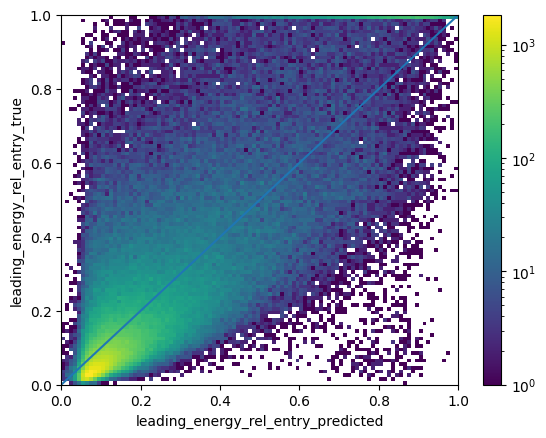

In [22]:
plt.hist2d(df_DNN_energy.leading_energy_rel_entry,df_MCLabelsLeading.leading_energy_rel_entry,range=[[0,1],[0,1]],bins=100,cmin=1,norm='log')
plt.xlabel('leading_energy_rel_entry_predicted')
plt.ylabel('leading_energy_rel_entry_true')
plt.plot(np.linspace(0,1),np.linspace(0,1))
plt.colorbar()
scp.stats.spearmanr(df_DNN_energy.leading_energy_rel_entry[np.isfinite(df_MCLabelsLeading.leading_energy_rel_entry)],df_MCLabelsLeading.leading_energy_rel_entry[np.isfinite(df_MCLabelsLeading.leading_energy_rel_entry)])
print(np.mean(df_MCLabelsLeading.leading_energy_rel_entry))

[[1.         0.30910003]
 [0.30910003 1.        ]]


/scratch/lflottau/lf/lib/python3.10/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/scratch/lflottau/lf/lib/python3.10/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Text(100000, 100, 'p=0.309')

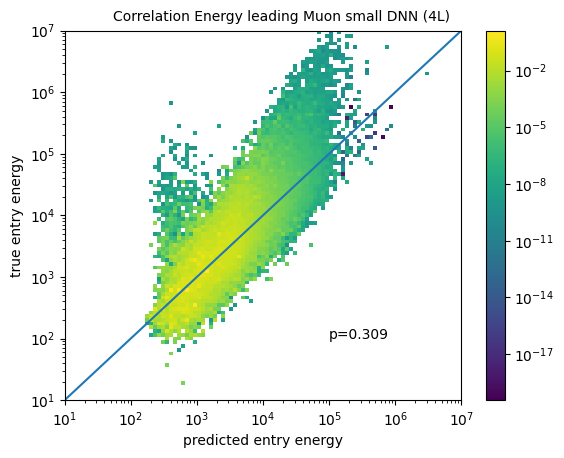

In [23]:
bins_entry=np.logspace(1,7,100)
plt.hist2d(df_DNN_energy.entry_energy,df_MCLabelsLeading.entry_energy,bins=bins_entry, weights=CorsikaWeightMap.simweights_GaisserH3a, range=[[np.min(df_MCLabelsLeading.entry_energy),np.max(df_MCLabelsLeading.entry_energy)],[np.min(df_DNN_energy.entry_energy),np.max(df_DNN_energy.entry_energy)]],norm='log')
plt.xlabel('predicted entry energy')
plt.ylabel('true entry energy')
plt.yscale('log')
plt.xscale('log')
plt.plot(bins_entry,bins_entry)
plt.xlim([10**1,10**7])
plt.ylim([10**1,10**7])
plt.figtext(0.2,0.9,'Correlation Energy leading Muon small DNN (4L)')
plt.colorbar()
#np.size(df_MCLabelsLeading.entry_energy)
entry_energy_sem, bins_bundle1, DNN_digitized=scp.stats.binned_statistic(df_DNN_energy.entry_energy, df_MCLabelsLeading.entry_energy, bins=bins_entry, statistic=nansem)
entry_energy_std, bins_bundle1, DNN_digitized=scp.stats.binned_statistic(df_DNN_energy.entry_energy, df_MCLabelsLeading.entry_energy, bins=bins_entry, statistic=np.nanstd)
entry_energy_mean, bins_bundle1, DNN_digitized=scp.stats.binned_statistic(df_DNN_energy.entry_energy,df_MCLabelsLeading.entry_energy,bins=bins_entry,statistic=np.nanmean)
#plt.plot(mid(bins_bundle)[::3],entry_energy_mean[::3],'.')
#print(entry_energy_sem)
print(np.corrcoef(df_DNN_energy.entry_energy[np.isfinite(df_MCLabelsLeading.entry_energy)], df_MCLabelsLeading.entry_energy[np.isfinite(df_MCLabelsLeading.entry_energy)]))
#plt.errorbar(mid(bins_bundle)[::3],entry_energy_mean[::3],entry_energy_sem[::3],fmt='x')
plt.text(10**5,10**2,'p=0.309')

In [24]:
np.size(df_DNN_energy_m.entry_energy[np.all([df_DNN_energy_m.entry_energy>10**5,df_MCLabelsLeading.entry_energy>10**5],axis=0)])/np.size(df_MCLabelsLeading.entry_energy[df_MCLabelsLeading.entry_energy>10**5])

0.021741741741741743

/scratch/lflottau/lf/lib/python3.10/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/scratch/lflottau/lf/lib/python3.10/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


PearsonRResult(statistic=0.3091000301638755, pvalue=0.0)
SignificanceResult(statistic=0.8401116679289489, pvalue=0.0)
0.03447447447447447


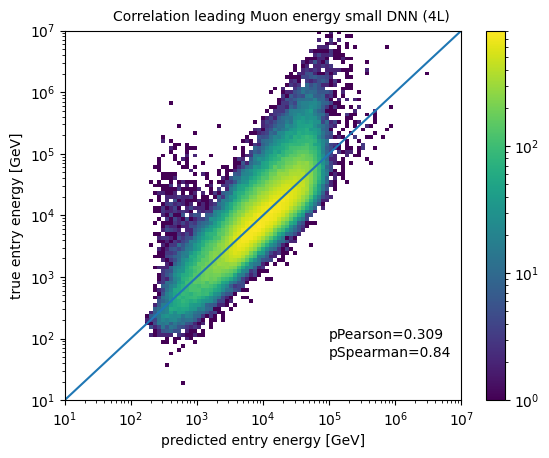

In [25]:
bins_entry=np.logspace(1,7,100)
plt.hist2d(df_DNN_energy.entry_energy,df_MCLabelsLeading.entry_energy,bins=bins_entry, range=[[np.min(df_MCLabelsLeading.entry_energy),np.max(df_MCLabelsLeading.entry_energy)],[np.min(df_DNN_energy.entry_energy),np.max(df_DNN_energy.entry_energy)]],norm='log')
plt.xlabel('predicted entry energy [GeV]')
plt.ylabel('true entry energy [GeV]')
plt.yscale('log')
plt.xscale('log')
plt.plot(bins_entry,bins_entry)
plt.xlim([10**1,10**7])
plt.ylim([10**1,10**7])
plt.figtext(0.2,0.9,'Correlation leading Muon energy small DNN (4L)')
plt.colorbar()
#np.size(df_MCLabelsLeading.entry_energy)
entry_energy_sem, bins_bundle1, DNN_digitized=scp.stats.binned_statistic(df_DNN_energy.entry_energy, df_MCLabelsLeading.entry_energy, bins=bins_entry, statistic=nansem)
entry_energy_std, bins_bundle1, DNN_digitized=scp.stats.binned_statistic(df_DNN_energy.entry_energy, df_MCLabelsLeading.entry_energy, bins=bins_entry, statistic=np.nanstd)
entry_energy_mean, bins_bundle1, DNN_digitized=scp.stats.binned_statistic(df_DNN_energy.entry_energy,df_MCLabelsLeading.entry_energy,bins=bins_entry,statistic=np.nanmean)
#plt.plot(mid(bins_bundle)[::3],entry_energy_mean[::3],'.')
#print(entry_energy_sem)
print(scp.stats.pearsonr(df_DNN_energy.entry_energy[np.isfinite(df_MCLabelsLeading.entry_energy)], df_MCLabelsLeading.entry_energy[np.isfinite(df_MCLabelsLeading.entry_energy)]))
print(scp.stats.spearmanr(df_DNN_energy.entry_energy[np.isfinite(df_MCLabelsLeading.entry_energy)], df_MCLabelsLeading.entry_energy[np.isfinite(df_MCLabelsLeading.entry_energy)]))
#plt.errorbar(mid(bins_bundle)[::3],entry_energy_mean[::3],entry_energy_sem[::3],fmt='x')
plt.text(10**5,10**2,'pPearson=0.309')
plt.text(10**5,10**1.7,'pSpearman=0.84')
print(np.size(df_DNN_energy.entry_energy[df_DNN_energy.entry_energy>10**5])/np.size(df_MCLabelsLeading.entry_energy[df_MCLabelsLeading.entry_energy>10**5]))

/scratch/lflottau/lf/lib/python3.10/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/scratch/lflottau/lf/lib/python3.10/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


NameError: name 'add_mean_error_entry' is not defined

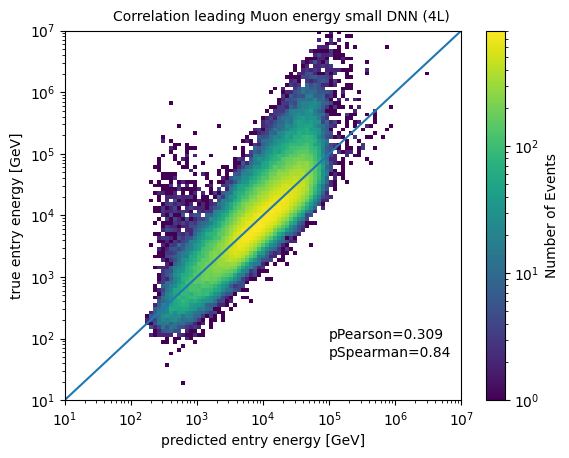

In [26]:
bins_entry=np.logspace(1,7,100)
plt.hist2d(df_DNN_energy.entry_energy,df_MCLabelsLeading.entry_energy,bins=bins_entry, range=[[np.min(df_MCLabelsLeading.entry_energy),np.max(df_MCLabelsLeading.entry_energy)],[np.min(df_DNN_energy.entry_energy),np.max(df_DNN_energy.entry_energy)]],norm='log')
plt.xlabel('predicted entry energy [GeV]')
plt.ylabel('true entry energy [GeV]')
plt.yscale('log')
plt.xscale('log')
plt.plot(bins_entry,bins_entry)
plt.xlim([10**1,10**7])
plt.ylim([10**1,10**7])
plt.figtext(0.2,0.9,'Correlation leading Muon energy small DNN (4L)')
plt.colorbar(label='Number of Events')
entry_energy_sem, bins_bundle1, DNN_digitized=scp.stats.binned_statistic(df_DNN_energy.entry_energy, df_MCLabelsLeading.entry_energy, bins=bins_entry, statistic=nansem)
entry_energy_std, bins_bundle1, DNN_digitized=scp.stats.binned_statistic(df_DNN_energy.entry_energy, df_MCLabelsLeading.entry_energy, bins=bins_entry, statistic=np.nanstd)
entry_energy_mean, bins_bundle1, DNN_digitized=scp.stats.binned_statistic(df_DNN_energy.entry_energy,df_MCLabelsLeading.entry_energy,bins=bins_entry,statistic=np.nanmean)
#print(scp.stats.pearsonr(df_DNN_energy.entry_energy[np.isfinite(df_MCLabelsLeading.entry_energy)], df_MCLabelsLeading.entry_energy[np.isfinite(df_MCLabelsLeading.entry_energy)]))
#print(scp.stats.spearmanr(df_DNN_energy.entry_energy[np.isfinite(df_MCLabelsLeading.entry_energy)], df_MCLabelsLeading.entry_energy[np.isfinite(df_MCLabelsLeading.entry_energy)]))
plt.text(10**5,10**2,'pPearson=0.309')
plt.text(10**5,10**1.7,'pSpearman=0.84')
add_mean_error_entry(df_DNN_energy,df_MCLabelsLeading,bins_entry,4)
print(np.size(df_DNN_energy.entry_energy[np.all([df_DNN_energy.entry_energy>10**5,df_MCLabelsLeading.entry_energy>10**5],axis=0)])/np.size(df_MCLabelsLeading.entry_energy[df_MCLabelsLeading.entry_energy>10**5]))

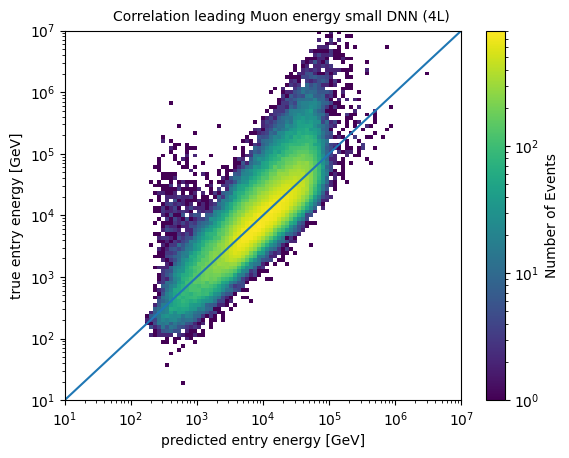

In [ ]:
bins_entry=np.logspace(1,7,100)
plt.hist2d(df_DNN_energy.entry_energy,df_MCLabelsLeading.entry_energy,bins=bins_entry, range=[[np.min(df_MCLabelsLeading.entry_energy),np.max(df_MCLabelsLeading.entry_energy)],[np.min(df_DNN_energy.entry_energy),np.max(df_DNN_energy.entry_energy)]],norm='log')
plt.xlabel('predicted entry energy [GeV]')
plt.ylabel('true entry energy [GeV]')
plt.yscale('log')
plt.xscale('log')
plt.plot(bins_entry,bins_entry)
plt.xlim([10**1,10**7])
plt.ylim([10**1,10**7])
plt.figtext(0.2,0.9,'Correlation leading Muon energy small DNN (4L)')
plt.colorbar(label='Number of Events')

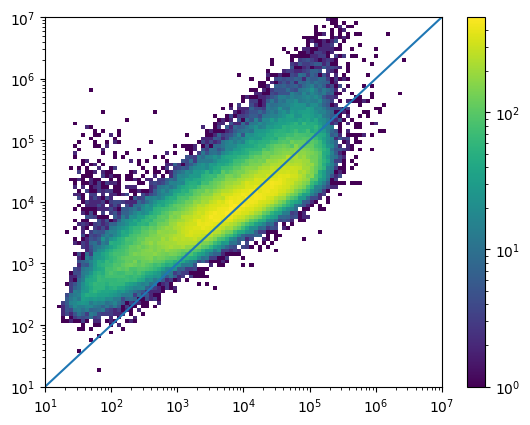

In [ ]:
plt.hist2d(df_DNN_energy.bundle_energy_at_entry*np.median(df_MCLabelsLeading.leading_energy_rel_entry[df_MCLabelsLeading.entry_energy>=10**4]),df_MCLabelsLeading.entry_energy,norm='log', bins=bins_entry)
plt.xscale('log')
plt.yscale('log')
plt.plot(bins_entry,bins_entry)
plt.colorbar()

In [ ]:
def add_mean_error_entry(pred: pd.DataFrame, true:pd.DataFrame, bins, step):
    sem, bins1, digitized=scp.stats.binned_statistic(pred.entry_energy,true.entry_energy,bins=bins,statistic=nansem)
    mean, bins1, digitized=scp.stats.binned_statistic(pred.entry_energy,true.entry_energy,bins=bins,statistic=np.nanmean)
    plt.errorbar(mid(bins)[::step],mean[::step],sem[::step],fmt='x',label='mean')
    plt.legend()
def add_mean_error_bundle(pred: pd.DataFrame, true:pd.DataFrame, bins, step):
    sem, bins1, digitized=scp.stats.binned_statistic(pred.bundle_energy_at_entry,true.bundle_energy_at_entry,bins=bins,statistic=nansem)
    mean, bins1, digitized=scp.stats.binned_statistic(pred.bundle_energy_at_entry,true.bundle_energy_at_entry,bins=bins,statistic=np.nanmean)
    plt.errorbar(mid(bins)[::step],mean[::step],sem[::step],fmt='x',label='mean')    
    plt.legend()

[[1.         0.87440097]
 [0.87440097 1.        ]]
SignificanceResult(statistic=0.9794437977832399, pvalue=0.0)


/scratch/lflottau/lf/lib/python3.10/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/scratch/lflottau/lf/lib/python3.10/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Text(100000, 50.11872336272722, 'pSpearman=0.979')

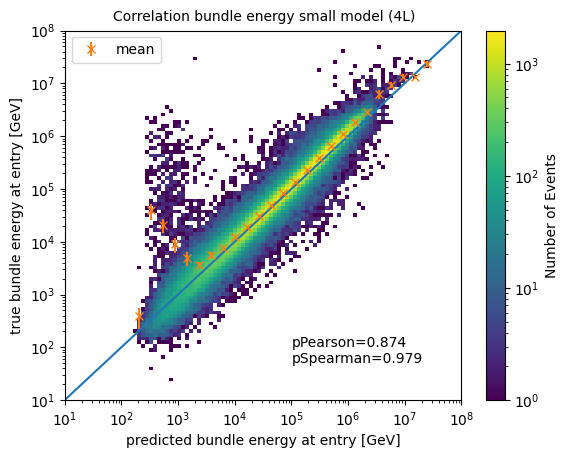

In [ ]:
bins_bundle=np.logspace(1,8,100)
plt.hist2d(df_DNN_energy.bundle_energy_at_entry,df_MCLabelsLeading.bundle_energy_at_entry,bins=bins_bundle,norm='log')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('predicted bundle energy at entry [GeV]')
plt.ylabel('true bundle energy at entry [GeV]')
plt.xlim([10**1,10**8])
plt.ylim([10**1,10**8])
plt.figtext(0.2,0.9,'Correlation bundle energy small model (4L)')
plt.colorbar(label='Number of Events')
plt.plot(bins_bundle,bins_bundle)
add_mean_error_bundle(df_DNN_energy, df_MCLabelsLeading, bins_bundle, 3)
print(np.corrcoef(df_DNN_energy.bundle_energy_at_entry, df_MCLabelsLeading.bundle_energy_at_entry))
print(scp.stats.spearmanr(df_DNN_energy.bundle_energy_at_entry,df_MCLabelsLeading.bundle_energy_at_entry))
plt.text(10**5,10**2,'pPearson=0.874')
plt.text(10**5,10**1.7,'pSpearman=0.979')

In [ ]:
np.mean(df_DNN_energy.entry_energy_log_uncertainty)
np.size(df_DNN_energy.entry_energy[df_DNN_energy.entry_energy_log_uncertainty<=np.mean(df_DNN_energy.entry_energy_log_uncertainty)])/np.size(df_DNN_energy.entry_energy)
entry_energy_pred_cut=df_DNN_energy.entry_energy[df_DNN_energy.entry_energy_log_uncertainty<=np.mean(df_DNN_energy.entry_energy_log_uncertainty)]
entry_energy_true_cut=df_MCLabelsLeading.entry_energy[df_DNN_energy.entry_energy_log_uncertainty<=np.mean(df_DNN_energy.entry_energy_log_uncertainty)]
np.max(df_DNN_energy.entry_energy_log_uncertainty)

3.439237356185913

0.5690453838932579

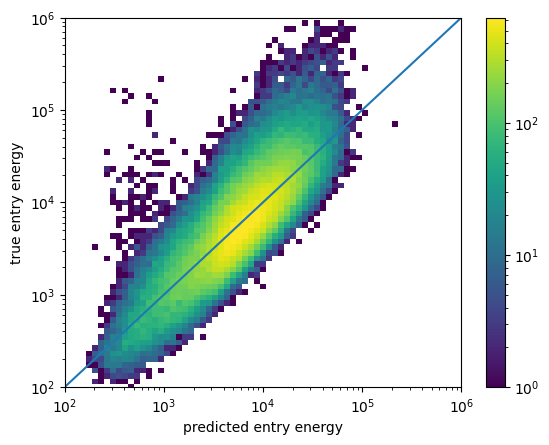

In [ ]:
plt.hist2d(entry_energy_pred_cut,entry_energy_true_cut,bins=bins_entry, range=[[np.min(entry_energy_true_cut),np.max(entry_energy_true_cut)],[np.min(entry_energy_pred_cut),np.max(entry_energy_pred_cut)]],cmin=1,norm='log')
plt.xlabel('predicted entry energy')
plt.ylabel('true entry energy')
plt.yscale('log')
plt.xscale('log')
plt.plot(bins_entry,bins_entry)
plt.xlim([10**2,10**6])
plt.ylim([10**2,10**6])
plt.colorbar()
np.size(entry_energy_pred_cut)/np.size(df_DNN_energy.entry_energy)
#add_mean_error_entry(entry_energy_pred_cut, entry_energy_true_cut, bins_entry, 3)

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 2.0000e+00, 5.0000e+00, 3.0000e+00,
        8.0000e+00, 9.0000e+00, 1.0000e+01, 2.2000e+01, 3.4000e+01,
        9.4000e+01, 2.1400e+02, 4.0900e+02, 9.2200e+02, 1.9410e+03,
        3.7700e+03, 7.0220e+03, 1.2443e+04, 1.9957e+04, 3.0068e+04,
        3.8299e+04, 3.9083e+04, 2.7085e+04, 1.1019e+04, 2.2430e+03,
        2.4500e+02, 1.6000e+01, 2.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-14.87939186, -14.39136097, -13.90333008, -13.41529919,
        -12.9272683 , -12.43923741, -11.95120651, -11.46317562,
        -10.97514473, -10.48711384,  -9.99908295,  -9.51105206,
         -9.02302117,  -8.53499028,  -8.04695939,  -7.5589285 ,
         -7.07089761,  -6.58286672,  -6.09483583,  -5.60680494

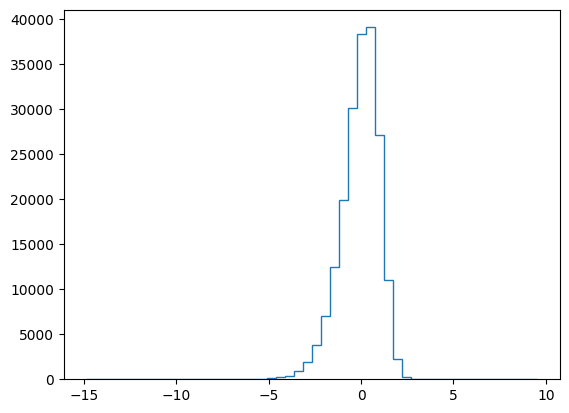

In [ ]:
DElog_norm=(np.log(df_DNN_energy.entry_energy)-np.log(df_MCLabelsLeading.entry_energy))/df_DNN_energy.entry_energy_log_uncertainty
plt.hist(DElog_norm, bins=50, histtype='step')

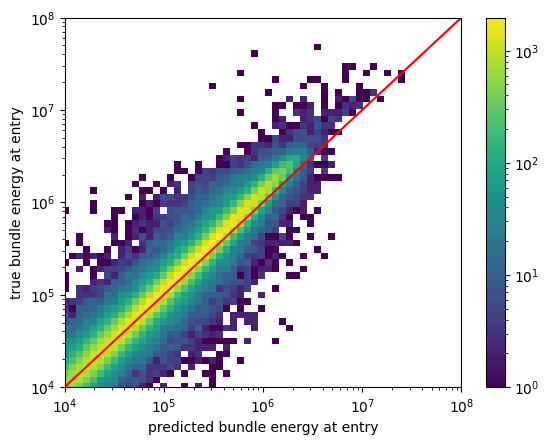

In [ ]:
bins_bundle2=np.logspace(4,8,500)
plt.hist2d(df_DNN_energy.bundle_energy_at_entry,df_MCLabelsLeading.bundle_energy_at_entry,bins=bins_bundle,norm='log')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('predicted bundle energy at entry')
plt.ylabel('true bundle energy at entry')
plt.xlim([10**4,10**8])
plt.ylim([10**4,10**8])
plt.colorbar()
plt.plot(bins_bundle,bins_bundle,'r')

In [ ]:
cut(df_DNN_energy.entry_energy_log_uncertainty<=0.9,df_DNN_energy,1,0)

NameError: name 'cut' is not defined

fraction prompt: 0.8897624039133473
fraction prompt over 10**5 : 0.22842639593908629
p= 0.33544095520252426
p= PearsonRResult(statistic=0.33544095520252387, pvalue=0.0)


Text(100000, 50.11872336272722, 'pSpearman=0.84')

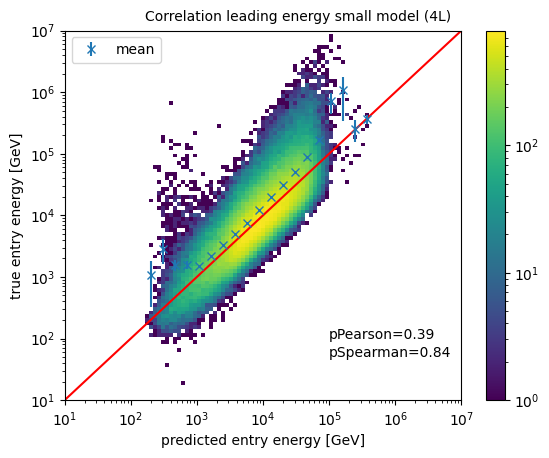

In [ ]:
c=0.9
entry_energy_pred_cut3=df_DNN_energy[df_DNN_energy.entry_energy_log_uncertainty<=c]
entry_energy_true_cut3=df_MCLabelsLeading[df_DNN_energy.entry_energy_log_uncertainty<=c]
entry_energy_weights_cut3=CorsikaWeightMap[df_DNN_energy.entry_energy_log_uncertainty<=c]
entry_energy_Parent_cut3=df_MCLabelsParent[df_DNN_energy.entry_energy_log_uncertainty<=c]
plt.hist2d(entry_energy_pred_cut3.entry_energy,entry_energy_true_cut3.entry_energy,bins=bins_entry,range=[[np.min(entry_energy_true_cut3.entry_energy),np.max(entry_energy_true_cut3.entry_energy)],[np.min(entry_energy_pred_cut3.entry_energy),np.max(entry_energy_pred_cut3.entry_energy)]],cmin=1,norm='log')
plt.xlabel('predicted entry energy [GeV]')
plt.ylabel('true entry energy [GeV]')
plt.yscale('log')
plt.xscale('log')
plt.plot(bins_entry,bins_entry,'r')
plt.xlim([10**1,10**7])
plt.ylim([10**1,10**7])
plt.figtext(0.25,0.9,'Correlation leading energy small model (4L)')
plt.colorbar()
entry_pred_cut3_prompt=entry_energy_pred_cut3[entry_energy_Parent_cut3.is_prompt_dennis==1]
entry_pred_cut3_prompt=entry_energy_pred_cut3[entry_energy_Parent_cut3.is_prompt_dennis==1]
prompt_DNN=df_DNN_energy[df_MCLabelsParent.is_prompt_dennis==1]
print('fraction prompt:',np.size(entry_energy_Parent_cut3.is_prompt_dennis[entry_energy_Parent_cut3.is_prompt_dennis==1])/np.size(df_MCLabelsLeading.entry_energy[df_MCLabelsParent.is_prompt_dennis==1]))
print('fraction prompt over 10**5 :', np.size(entry_pred_cut3_prompt.entry_energy[entry_pred_cut3_prompt.entry_energy>=10**5])/np.size(prompt_DNN.entry_energy[prompt_DNN.entry_energy>=10**5]))
#cut(df_DNN_energy.entry_energy_log_uncertainty<=c, df_DNN_energy, 1,0)
print('p=',np.corrcoef(entry_energy_pred_cut3.entry_energy[np.isfinite(entry_energy_true_cut3.entry_energy)], entry_energy_true_cut3.entry_energy[np.isfinite(entry_energy_true_cut3.entry_energy)])[0,1])
print('p=',scp.stats.pearsonr(entry_energy_pred_cut3.entry_energy[np.isfinite(entry_energy_true_cut3.entry_energy)], entry_energy_true_cut3.entry_energy[np.isfinite(entry_energy_true_cut3.entry_energy)]))
np.size(entry_energy_pred_cut3.entry_energy)/np.size(df_DNN_energy.entry_energy)
add_mean_error_entry(entry_energy_pred_cut3, entry_energy_true_cut3, bins_entry, 3)
plt.text(10**5,10**2,'pPearson=0.39')
plt.text(10**5,10**1.7,'pSpearman=0.84')

(1e-10, 0.0031622776601683794)

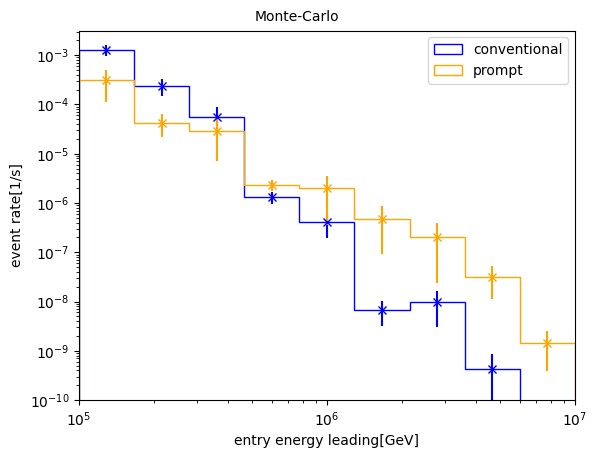

In [ ]:
prompt_conventional_flux_entry(np.logspace(5,7,10),entry_energy_true_cut3,entry_energy_Parent_cut3,entry_energy_weights_cut3.simweights_GaisserH3a)
plt.figtext(0.4,0.9,'Monte-Carlo')
plt.ylim([10**(-10),10**(-2.5)])

(1e-10, 0.0031622776601683794)

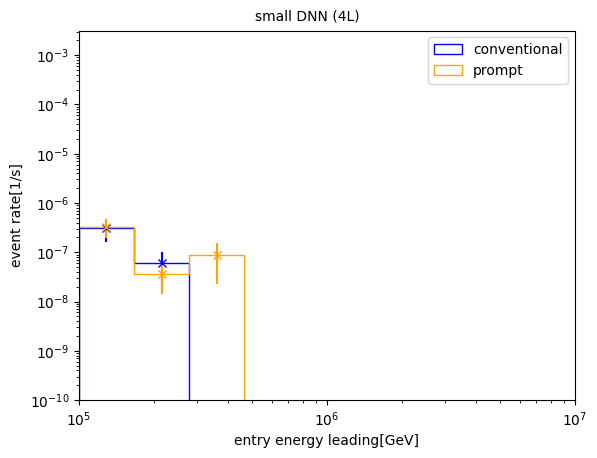

In [ ]:
prompt_conventional_flux_entry(np.logspace(5,7,10),entry_energy_pred_cut3,entry_energy_Parent_cut3,entry_energy_weights_cut3.simweights_GaisserH3a)
plt.figtext(0.4,0.9,'small DNN (4L)')
plt.ylim([10**(-10),10**(-2.5)])

In [ ]:
p=0.7
cut=np.max(np.sort(df_DNN_energy.entry_energy_log_uncertainty)[0:round(p*np.size(df_DNN_energy.entry_energy_log_uncertainty))])
entry_energy_pred_cut_p=df_DNN_energy.entry_energy[df_DNN_energy.entry_energy_log_uncertainty<=np.quantile(df_DNN_energy.entry_energy_log_uncertainty,p)]
entry_energy_true_cut_p=df_MCLabelsLeading.entry_energy[df_DNN_energy.entry_energy_log_uncertainty<=np.quantile(df_DNN_energy.entry_energy_log_uncertainty,p)]
ParentInfo_entry_cut_p=df_MCLabelsParent[df_DNN_energy.entry_energy_log_uncertainty<=np.quantile(df_DNN_energy.entry_energy_log_uncertainty,p)]
print(np.quantile(df_DNN_energy.entry_energy_log_uncertainty,p))
cut

0.7598402738571166


0.7598394751548767

Fraction prompt: 0.5262928022361985


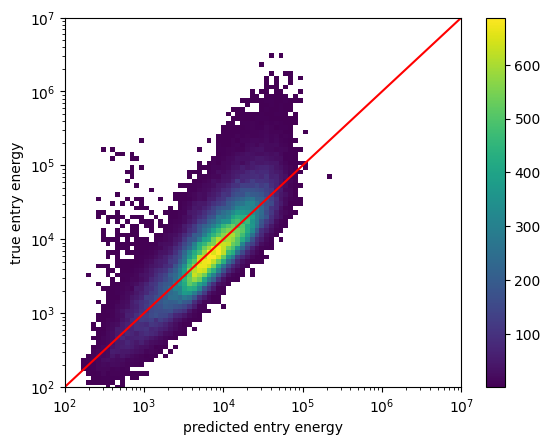

In [ ]:
plt.hist2d(entry_energy_pred_cut_p,entry_energy_true_cut_p,bins=bins_entry,range=[[np.min(entry_energy_true_cut_p),np.max(entry_energy_true_cut_p)],[np.min(entry_energy_pred_cut_p),np.max(entry_energy_pred_cut_p)]],cmin=1)
plt.xlabel('predicted entry energy')
plt.ylabel('true entry energy')
plt.yscale('log')
plt.xscale('log')
plt.plot(bins_entry,bins_entry,'r')
plt.xlim([10**2,10**7])
plt.ylim([10**2,10**7])
plt.colorbar()
print('Fraction prompt:',np.size(ParentInfo_entry_cut_p.is_prompt_dennis[ParentInfo_entry_cut_p.is_prompt_dennis==1])/np.size(df_MCLabelsParent.is_prompt_dennis[df_MCLabelsParent.is_prompt_dennis==1]))
#np.size(entry_energy_pred_cut_p)/np.size(df_DNN_energy.entry_energy)

Fraction prompt: 0.6128581411600279


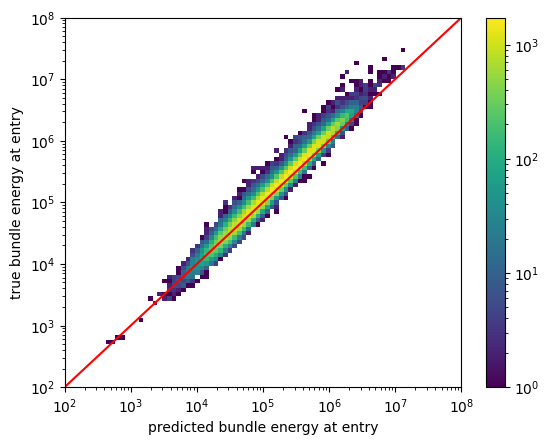

In [ ]:
bundle_energy_pred_cut=df_DNN_energy.bundle_energy_at_entry[df_DNN_energy.bundle_energy_at_entry_log_uncertainty<=np.median(df_DNN_energy.bundle_energy_at_entry_log_uncertainty)]
bundle_energy_true_cut=df_MCLabelsLeading.bundle_energy_at_entry[df_DNN_energy.bundle_energy_at_entry_log_uncertainty<=np.median(df_DNN_energy.bundle_energy_at_entry_log_uncertainty)]
bundle_energy_Parent_cut=df_MCLabelsParent[df_DNN_energy.bundle_energy_at_entry_log_uncertainty<=np.median(df_DNN_energy.bundle_energy_at_entry_log_uncertainty)]
plt.hist2d(bundle_energy_pred_cut,bundle_energy_true_cut,bins=bins_bundle,cmin=1,norm='log')
plt.xscale('log')
plt.yscale('log')
plt.xlim([10**2,10**8])
plt.ylim([10**2,10**8])
plt.xlabel('predicted bundle energy at entry')
plt.ylabel('true bundle energy at entry')
plt.colorbar()
plt.plot(bins_bundle,bins_bundle,'r')
print('Fraction prompt:',np.size(bundle_energy_Parent_cut.is_prompt_dennis[bundle_energy_Parent_cut.is_prompt_dennis==1])/np.size(df_MCLabelsParent.is_prompt_dennis[df_MCLabelsParent.is_prompt_dennis==1]))

In [ ]:
np.max(df_DNN_energy.bundle_energy_at_entry_log_uncertainty)

2.4445807933807373

fraction total cut: 0.834613234019196
fraction prompt cut: 0.8793675751222921
fraction bundle prompt over 10**5: 0.9181840400830991
p= 0.9338233453894177


/scratch/lflottau/lf/lib/python3.10/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/scratch/lflottau/lf/lib/python3.10/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_873007/3110049016.py:10: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


SignificanceResult(statistic=0.9902753869957129, pvalue=0.0)


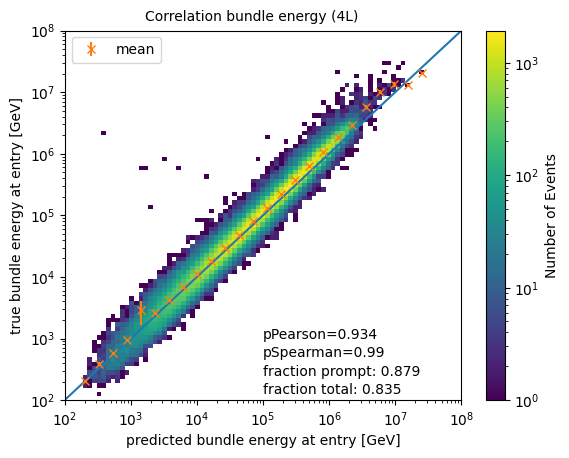

In [ ]:
c2=0.48
#bundle_energy_pred_cut2=df_DNN_energy.bundle_energy_at_entry[df_DNN_energy.bundle_energy_at_entry_log_uncertainty<=0.2]
#bundle_energy_true_cut2=df_MCLabelsLeading.bundle_energy_at_entry[df_DNN_energy.bundle_energy_at_entry_log_uncertainty<=0.2]
bundle_energy_pred_cut2=df_DNN_energy[df_DNN_energy.bundle_energy_at_entry_log_uncertainty<=c2]
bundle_energy_true_cut2=df_MCLabelsLeading[df_DNN_energy.bundle_energy_at_entry_log_uncertainty<=c2]
ParentInfo_bundle_cut2=df_MCLabelsParent[df_DNN_energy.bundle_energy_at_entry_log_uncertainty<=c2]
weights_bundle_cut2=CorsikaWeightMap[df_DNN_energy.bundle_energy_at_entry_log_uncertainty<=c2]
plt.hist2d(bundle_energy_pred_cut2.bundle_energy_at_entry,bundle_energy_true_cut2.bundle_energy_at_entry,norm='log',bins=bins_bundle,label='bundle energy, log uncertainty <= 0.5')
plt.xscale('log')
plt.yscale('log')
plt.xlim([10**2,10**8])
plt.ylim([10**2,10**8])
plt.figtext(0.25,0.9,'Correlation bundle energy (4L)')
plt.xlabel('predicted bundle energy at entry [GeV]')
plt.ylabel('true bundle energy at entry [GeV]')
plt.colorbar(label='Number of Events')
#plt.legend()
plt.plot(bins_bundle,bins_bundle)
#print('fraction:', np.size(bundle_energy_true_cut2.bundle_energy_at_entry)/np.size(df_MCLabelsLeading.bundle_energy_at_entry))
#print('fraction prompt:',np.size(bundle_energy_pred_cut2.bundle_energy_at_entry[ParentInfo_bundle_cut2.is_prompt_dennis==1])/np.size(df_MCLabelsLeading.bundle_energy_at_entry[df_MCLabelsParent.is_prompt_dennis==1]))
#print('fraction over 10**4:',np.size(bundle_energy_pred_cut2.bundle_energy_at_entry[bundle_energy_true_cut2.bundle_energy_at_entry>=10**4])/np.size(df_MCLabelsLeading.bundle_energy_at_entry[df_MCLabelsLeading.bundle_energy_at_entry>=10**4]))
#np.size(bundle_energy_pred_cut2.bundle_energy_at_entry)/np.size(df_DNN_energy.bundle_energy_at_entry)
cut(df_DNN_energy.bundle_energy_at_entry_log_uncertainty<=c2, df_DNN_energy, 0,1)
add_mean_error_bundle(bundle_energy_pred_cut2, bundle_energy_true_cut2, bins_bundle, 3)
print('p=', np.corrcoef(bundle_energy_pred_cut2.bundle_energy_at_entry, bundle_energy_true_cut2.bundle_energy_at_entry)[0,1])
plt.text(10**5,10**3,'pPearson=0.934')
plt.text(10**5,10**2.4,'fraction prompt: 0.879')
plt.text(10**5,10**2.1,'fraction total: 0.835')
plt.text(10**5,10**2.7,'pSpearman=0.99')
#plt.text(10**4.3, 10**2.1,'fraction prompt over 10**5: 0.918')
print(scp.stats.spearmanr(bundle_energy_pred_cut2.bundle_energy_at_entry,bundle_energy_true_cut2.bundle_energy_at_entry))

(1e-11, 0.015848931924611134)

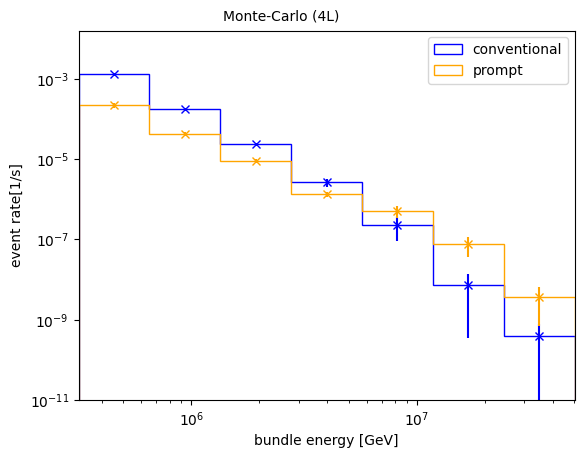

In [ ]:
prompt_conventional_flux_bundle(np.logspace(5.5,7.7,8),bundle_energy_true_cut2,ParentInfo_bundle_cut2,weights_bundle_cut2.simweights_GaisserH3a)
plt.figtext(0.35,0.9,'Monte-Carlo (4L)')
plt.ylim([10**(-11),10**(-1.8)])

(1e-11, 0.015848931924611134)

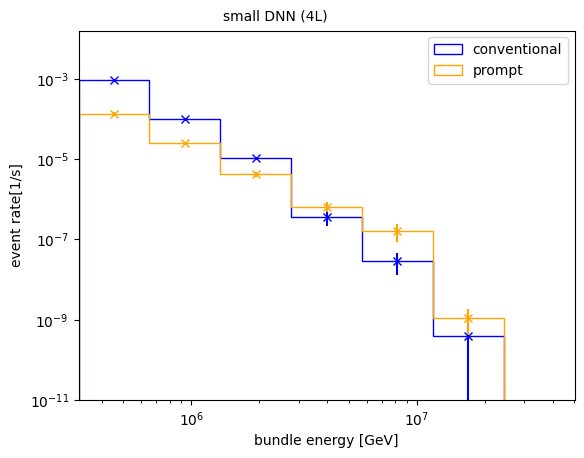

In [ ]:
prompt_conventional_flux_bundle(np.logspace(5.5,7.7,8),bundle_energy_pred_cut2,ParentInfo_bundle_cut2,weights_bundle_cut2.simweights_GaisserH3a)
plt.figtext(0.35,0.9,'small DNN (4L)')
plt.ylim([10**(-11),10**(-1.8)])

162697

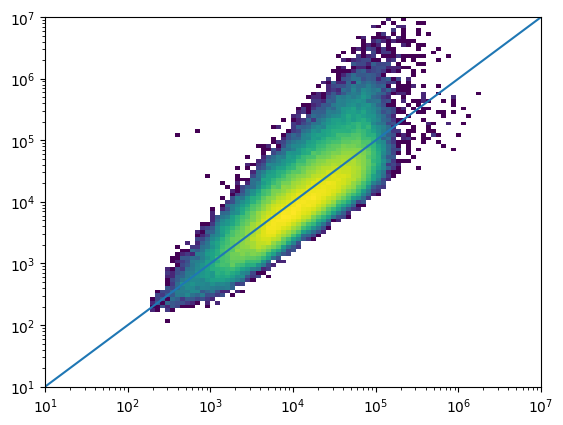

In [ ]:
plt.hist2d(bundle_energy_pred_cut2.bundle_energy_at_entry*bundle_energy_pred_cut2.leading_energy_rel_entry,bundle_energy_true_cut2.entry_energy,bins=bins_entry,norm='log')
plt.xscale('log')
plt.yscale('log')
plt.plot(bins_entry,bins_entry)
np.size(bundle_energy_pred_cut2.bundle_energy_at_entry*bundle_energy_pred_cut2.leading_energy_rel_entry)

In [ ]:
cut(df_DNN_energy.bundle_energy_at_entry_log_uncertainty<=c2,df_DNN_energy,0,1)

fraction total cut: 0.834613234019196
fraction prompt cut: 0.8793675751222921
fraction bundle prompt over 10**5: 0.9181840400830991


(           Run  Event  SubEvent  SubEventStream  exists   
 1    300130021      1         0               0       1  \
 2    300130021      2         0               0       1   
 3    300130021      3         0               0       1   
 4    300130021      4         0               0       1   
 5    300130021      5         0               0       1   
 ..         ...    ...       ...             ...     ...   
 477  300110164    987         0               0       1   
 478  300110164    988         0               0       1   
 479  300110164    989         0               0       1   
 480  300110164    990         0               0       1   
 481  300110164    993         0               0       1   
 
      bundle_energy_at_entry  bundle_energy_at_entry_log_uncertainty   
 1              1.824413e+05                                0.297445  \
 2              6.296365e+06                                0.254794   
 3              2.521519e+04                                0.

fraction total cut: 0.00037447996019226727
fraction prompt cut: 0.0008298392732354996
fraction bundle prompt over 10**5: 0.0011609434192838813
fraction total cut: 0.04145954846950553
fraction prompt cut: 0.07769916142557652
fraction bundle prompt over 10**5: 0.10857876084565563
fraction total cut: 0.14637549567296101
fraction prompt cut: 0.23619846261355695
fraction bundle prompt over 10**5: 0.32426982769155566
fraction total cut: 0.2501628731333713
fraction prompt cut: 0.3689727463312369
fraction bundle prompt over 10**5: 0.48942930465599416
fraction total cut: 0.343105721335611
fraction prompt cut: 0.4685097833682739
fraction bundle prompt over 10**5: 0.5946474398142491
fraction total cut: 0.4209975530556026
fraction prompt cut: 0.5411862334032146
fraction bundle prompt over 10**5: 0.6602712941464011
fraction total cut: 0.4900916706423101
fraction prompt cut: 0.6039482879105521
fraction bundle prompt over 10**5: 0.712024929732372
fraction total cut: 0.5500648927602251
fraction prompt

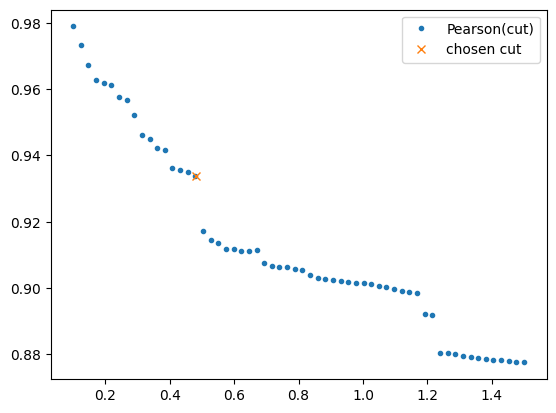

In [ ]:
c=np.linspace(0.1,1.5,60)
cp=np.array([])
cfraction=np.array([])
for i in range(np.size(c)):
    c_pred,c_true,c_weight,c_Parent=cut(df_DNN_energy.bundle_energy_at_entry_log_uncertainty<=c[i],df_DNN_energy,0,1)
    cp=np.append(cp,np.corrcoef(c_pred.bundle_energy_at_entry,c_true.bundle_energy_at_entry)[0,1])
    cfraction=np.append(cfraction, np.size(c_true.entry_energy)/np.size(df_MCLabelsLeading.entry_energy))
#plt.plot(cfraction,cp,'.')
plt.plot(c,cp,'.',label='Pearson(cut)')
print(cp)
plt.plot(0.48,np.corrcoef(bundle_energy_pred_cut2.bundle_energy_at_entry, bundle_energy_true_cut2.bundle_energy_at_entry)[0,1],'x',label='chosen cut')
plt.legend()

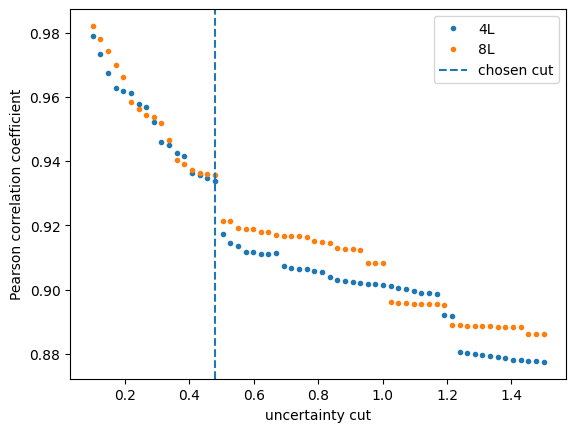

In [ ]:
#plt.plot(cfraction,cp,'.',label='4L')
#plt.plot(cfraction_m,cp_m,'.',label='8L')
plt.plot(c,cp,'.',label='4L')
plt.plot(c_m,cp_m,'.',label='8L')
#plt.plot(np.size(bundle_energy_pred_cut2.bundle_energy_at_entry)/np.size(df_DNN_energy.bundle_energy_at_entry),np.corrcoef(bundle_energy_pred_cut2.bundle_energy_at_entry, bundle_energy_true_cut2.bundle_energy_at_entry)[0,1],'x',label='chosen cut')
plt.ylabel('Pearson correlation coefficient')
plt.xlabel('uncertainty cut')
plt.axvline(x=0.48,linestyle='--',label='chosen cut')
plt.legend()

fraction total cut: 0.006340510010926607
fraction prompt cut: 0.014456673654786862
fraction bundle prompt over 10**5: 0.02023422650070513
fraction total cut: 0.09456388474225005
fraction prompt cut: 0.16448287910552062
fraction bundle prompt over 10**5: 0.22797228524127783
fraction total cut: 0.20795949460594962
fraction prompt cut: 0.3187456324248777
fraction bundle prompt over 10**5: 0.4300079710589245
fraction total cut: 0.30625278936271716
fraction prompt cut: 0.43658280922431864
fraction bundle prompt over 10**5: 0.5678459746152431
fraction total cut: 0.3882331214700134
fraction prompt cut: 0.5189989517819706
fraction bundle prompt over 10**5: 0.6470047213195168
fraction total cut: 0.4612310643951636
fraction prompt cut: 0.5871767994409504
fraction bundle prompt over 10**5: 0.7060518731988472
fraction total cut: 0.5252209688258258
fraction prompt cut: 0.6401554856743537
fraction bundle prompt over 10**5: 0.746949537065424
fraction total cut: 0.5816494559780853
fraction prompt cut:

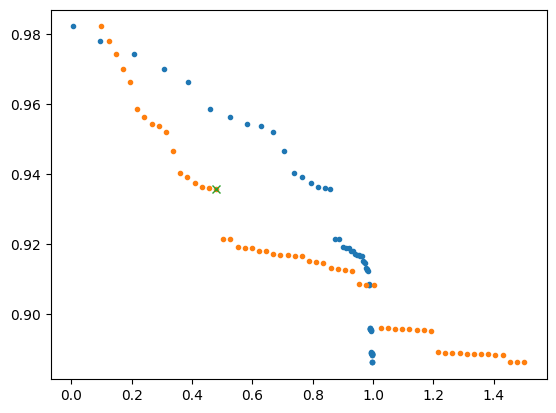

In [ ]:
c_m=np.linspace(0.1,1.5,60)
cp_m=np.array([])
cfraction_m=np.array([])
for i in range(np.size(c_m)):
    c_pred_m,c_true_m,c_weight_m,c_Parent_m=cut(df_DNN_energy_m.bundle_energy_at_entry_log_uncertainty<=c[i],df_DNN_energy_m,0,1)
    cp_m=np.append(cp_m,np.corrcoef(c_pred_m.bundle_energy_at_entry,c_true_m.bundle_energy_at_entry)[0,1])
    cfraction_m=np.append(cfraction_m, np.size(c_true_m.entry_energy)/np.size(df_MCLabelsLeading.entry_energy))
plt.plot(cfraction_m,cp_m,'.')
plt.plot(c_m,cp_m,'.')
plt.plot(0.48,np.corrcoef(df_DNN_energy_m.bundle_energy_at_entry[df_DNN_energy_m.bundle_energy_at_entry_log_uncertainty<=0.48],df_MCLabelsLeading.bundle_energy_at_entry[df_DNN_energy_m.bundle_energy_at_entry_log_uncertainty<=0.48])[0,1],'x')

In [ ]:
df_MCLabelsParent.keys()

Index(['Run', 'Event', 'SubEvent', 'SubEventStream', 'exists',
       'direct_parent_energy', 'direct_parent_pdg', 'first_interaction_energy',
       'first_interaction_pdg', 'first_prompt_energy_00',
       'first_prompt_num_decays_00', 'first_prompt_pdg_00',
       'is_first_interaction_prompt_00', 'is_last_interaction_prompt_00',
       'is_prompt_dennis', 'most_energetic_muon_energy',
       'most_energetic_muon_num_decays'],
      dtype='object')

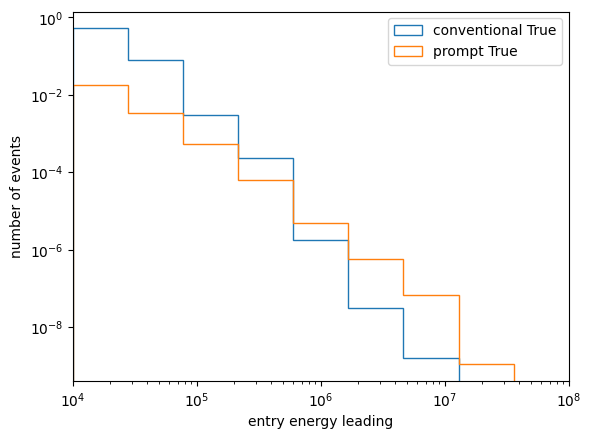

In [ ]:
b=np.logspace(4,8,10)
plt.hist(df_MCLabelsLeading.entry_energy[df_MCLabelsParent.is_prompt_dennis==0],weights=CorsikaWeightMap.simweights_GaisserH3a[df_MCLabelsParent.is_prompt_dennis==0], bins=b,histtype='step', log=True, label='conventional True')
plt.hist(df_MCLabelsLeading.entry_energy[df_MCLabelsParent.is_prompt_dennis==1],weights=CorsikaWeightMap.simweights_GaisserH3a[df_MCLabelsParent.is_prompt_dennis==1], bins=b, histtype='step',label='prompt True')
#plt.hist(df_DNN_energy.entry_energy[df_MCLabelsParent.is_prompt_dennis==0],bins=b,histtype='step', log=True, label='conventional DNN')
#plt.hist(df_DNN_energy.entry_energy[df_MCLabelsParent.is_prompt_dennis==1], bins=b, histtype='step',label='prompt DNN')
plt.xscale('log')
plt.xlim([10**4,10**8])
plt.xlabel('entry energy leading')
plt.ylabel('number of events')
plt.legend()

0.01658445061184466


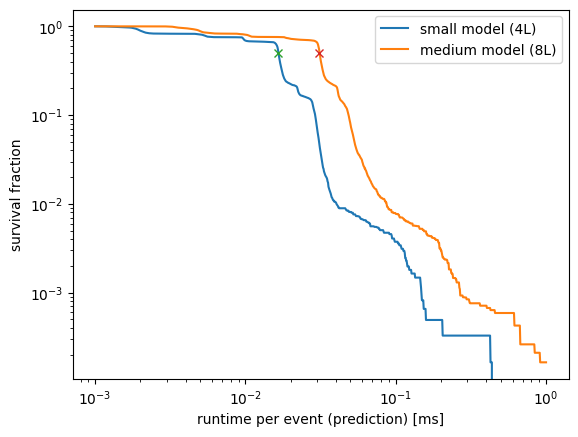

In [ ]:
length=np.logspace(-3,0,1000)
per=np.logspace(-4,0,1000)
energy_cut=df_MCLabelsLeading.bundle_energy_at_entry>=10**5
df_big_energies_DNN=df_DNN_energy[energy_cut]
runtime_survival_prediction_m=np.zeros(np.size(length))
runtime_survival_prediction_cut=np.zeros(np.size(length))
#runtime_survival_prediction_MuEX=np.zeros(np.size(length))
runtime_survival_prediction=np.zeros(np.size(length))
for i in range(np.size(length)):
    runtime_survival_prediction[i]=np.size(df_DNN_energy.runtime_prediction[df_DNN_energy.runtime_prediction>=length[i]])/np.size(df_DNN_energy.runtime_prediction)
    runtime_survival_prediction_m[i]=np.size(df_DNN_energy_m.runtime_prediction[df_DNN_energy_m.runtime_prediction>=length[i]])/np.size(df_DNN_energy_m.runtime_prediction)
    runtime_survival_prediction_cut[i]=np.size(df_big_energies_DNN.runtime_prediction[df_big_energies_DNN.runtime_prediction>=length[i]])/np.size(df_big_energies_DNN.runtime_prediction)
    #runtime_survival_prediction_MuEX[i]=np.size(df_energy_MuEX.speed[df_energy_MuEX.speed>=length[i]])/np.size(df_energy_MuEX.speed)
plt.plot(length, runtime_survival_prediction, label='small model (4L)')
plt.plot(length, runtime_survival_prediction_m, label='medium model (8L)')
#plt.plot(length, runtime_survival_prediction_cut, label='small model energy cut')
#plt.plot(np.quantile(df_DNN_energy.runtime_prediction,0.9),0.1,'x')
#plt.plot(length, runtime_survival_prediction_MuEX, label='MuEX Fit')
plt.plot(0.0165,0.5,'x')
plt.plot(0.0311,0.5,'x')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('runtime per event (prediction) [ms]')
plt.ylabel('survival fraction')
plt.legend()
print(np.median(df_DNN_energy.runtime_prediction))
#print('Fraction small DNN slower than MuEX:',np.size(df_DNN_energy.runtime_prediction[df_DNN_energy.runtime_prediction>=df_energy_MuEX.speed]))/np.size(df_DNN_energy.runtime_prediction)
#print('Fraction standard DNN slower than MuEX:',np.size(df_DNN_energy_m.runtime_prediction[df_DNN_energy_m.runtime_prediction>=np.median(df_energy_MuEX.speed)])/np.size(df_DNN_energy_m.runtime_prediction))
np.mean(df_DNN_energy_m.runtime_prediction)
#plt.plot(np.quantile(df_DNN_energy.runtime_prediction,1-per),per)
def survival_fraction(runtime):
    length=np.logspace(-3,0,1000)
    runtime_survival_prediction=np.zeros(np.size(length))
    for i in range(np.size(length)):
        runtime_survival_prediction[i]=np.size(runtime[runtime>=length[i]])/np.size(runtime)
    return runtime_survival_prediction


In [ ]:
print(np.median(df_DNN_energy_m.runtime_prediction))
print(np.median(df_DNN_energy.runtime_prediction))
np.median(df_DNN_energy_m.runtime_prediction/df_DNN_energy.runtime_prediction)
#print(np.size(df_DNN_energy.runtime_prediction[df_DNN_energy.runtime_prediction<df_DNN_energy_m.runtime_prediction])/np.size(df_DNN_energy.runtime_prediction))

0.031144464039243758
0.01658445061184466


1.8859188660241089

18.073742882888418


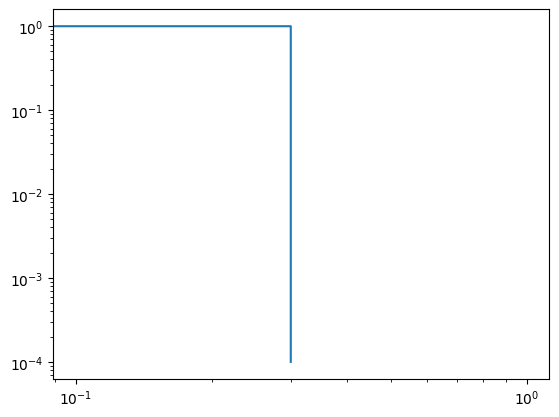

In [ ]:
print(np.median(df_energy_MuEX.speed/df_DNN_energy.runtime_prediction))
np.median(df_energy_MuEX.speed)
plt.plot(np.quantile(df_energy_MuEX.speed,1-per),per)
plt.xscale('log')
plt.yscale('log')

In [ ]:
df_energy_MuEX.speed[df_energy_MuEX.speed<0.29]

7      0.0
8      0.0
47     0.0
9      0.0
53     0.0
      ... 
214    0.0
418    0.0
264    0.0
274    0.0
45     0.0
Name: speed, Length: 390, dtype: float64

In [ ]:
print(np.median(df_DNN_energy_s_bias.runtime_prediction))
print(np.median(df_DNN_energy_bigger_conv.runtime_prediction))
print(np.mean(df_DNN_energy_bigger_conv.runtime_prediction/df_DNN_energy_s_bias.runtime_prediction))

0.006025285004516659
0.014608117780881003
2.693782255118893


0.0006753066554665565


0.000980628512100659

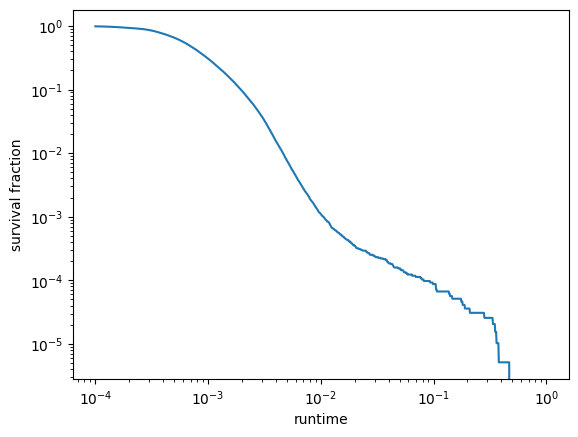

In [ ]:
length2=np.logspace(-4,0,1000)
runtime_survival=np.zeros(np.size(length2))
for i in range(np.size(length2)):
    runtime_survival[i]=np.size(df_DNN_energy.runtime_preprocess[df_DNN_energy.runtime_preprocess>=length2[i]])/np.size(df_DNN_energy.runtime_preprocess)
plt.plot(length2,runtime_survival,)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('runtime')
plt.ylabel('survival fraction')
print(np.median(df_DNN_energy.runtime_preprocess))
np.mean(df_DNN_energy.runtime_preprocess)

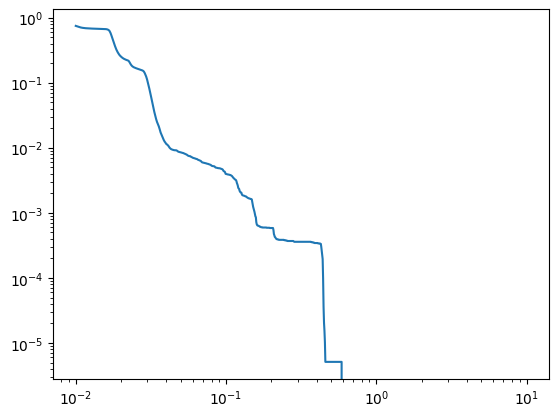

In [ ]:
runtime_total=df_DNN_energy.runtime_prediction+df_DNN_energy.runtime_preprocess
length3=np.logspace(-2,1,1000)
runtime_survival_total=np.zeros(np.size(length3))
for i in range(np.size(length3)):
    runtime_survival_total[i]=np.size(runtime_total[runtime_total>=length3[i]])/np.size(runtime_total)
plt.plot(length3,runtime_survival_total)
plt.xscale('log')
plt.yscale('log')

<ErrorbarContainer object of 3 artists>

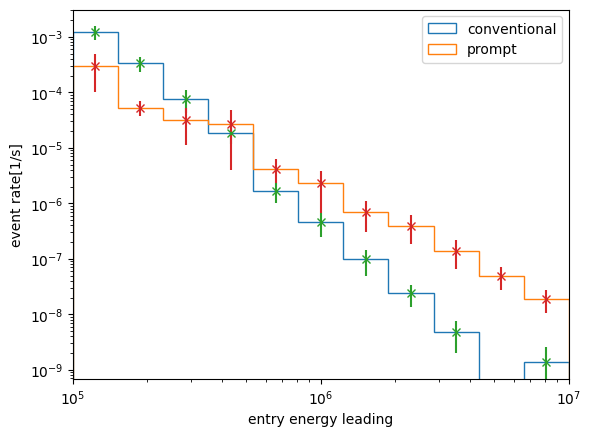

In [ ]:
b=np.logspace(5,7,12)
plt.hist(df_MCLabelsLeading.entry_energy[df_MCLabelsParent.is_prompt_dennis==0],bins=b,histtype='step', log=True, label='conventional', weights=CorsikaWeightMap.simweights_GaisserH3a[df_MCLabelsParent.is_prompt_dennis==0])
plt.hist(df_MCLabelsLeading.entry_energy[df_MCLabelsParent.is_prompt_dennis==1], bins=b, histtype='step',log=True,label='prompt',weights=CorsikaWeightMap.simweights_GaisserH3a[df_MCLabelsParent.is_prompt_dennis==1])
plt.xscale('log')
plt.xlim([10**5,10**7])
plt.xlabel('entry energy leading')
plt.ylabel('event rate[1/s]')
plt.legend()
errors_conventional, error_edges_conventional=bh.numpy.histogram(df_MCLabelsLeading.entry_energy[df_MCLabelsParent.is_prompt_dennis==0],bins=b,weights=CorsikaWeightMap.simweights_GaisserH3a[df_MCLabelsParent.is_prompt_dennis==0]**2)
errors_prompt, errors_edges_prompt=bh.numpy.histogram(df_MCLabelsLeading.entry_energy[df_MCLabelsParent.is_prompt_dennis==1],bins=b,weights=CorsikaWeightMap.simweights_GaisserH3a[df_MCLabelsParent.is_prompt_dennis==1]**2)
conventional_weighted, bins_conv=bh.numpy.histogram(df_MCLabelsLeading.entry_energy[df_MCLabelsParent.is_prompt_dennis==0],bins=b, weights=CorsikaWeightMap.simweights_GaisserH3a[df_MCLabelsParent.is_prompt_dennis==0])
prompt_weighted, bins_prompt=bh.numpy.histogram(df_MCLabelsLeading.entry_energy[df_MCLabelsParent.is_prompt_dennis==1],bins=b, weights=CorsikaWeightMap.simweights_GaisserH3a[df_MCLabelsParent.is_prompt_dennis==1])
mids=10**(np.log10(b)[:(np.size(b)-1)]+np.diff(np.log10(b))/2)
plt.errorbar(mids,conventional_weighted,yerr=np.sqrt(errors_conventional),fmt='x')
plt.errorbar(mids,prompt_weighted,yerr=np.sqrt(errors_prompt),fmt='x')

<ErrorbarContainer object of 3 artists>

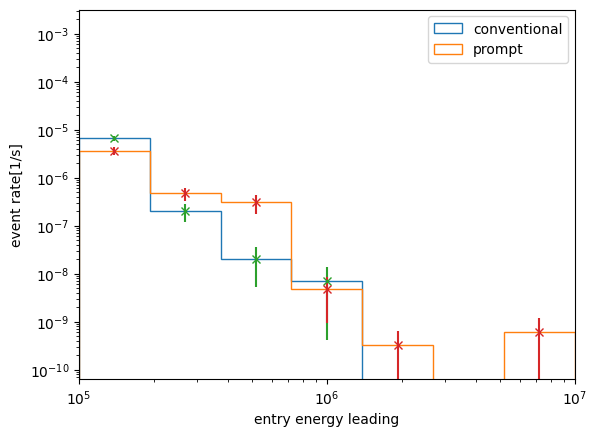

In [ ]:
b=np.logspace(5,7,8)
plt.hist(df_DNN_energy.bundle_energy_at_entry[df_MCLabelsParent.is_prompt_dennis==0]*df_DNN_energy.leading_energy_rel_entry[df_MCLabelsParent.is_prompt_dennis==0],bins=b,histtype='step', log=True, label='conventional', weights=CorsikaWeightMap.simweights_GaisserH3a[df_MCLabelsParent.is_prompt_dennis==0])
plt.hist(df_DNN_energy.bundle_energy_at_entry[df_MCLabelsParent.is_prompt_dennis==1]*df_DNN_energy.leading_energy_rel_entry[df_MCLabelsParent.is_prompt_dennis==1], bins=b, histtype='step',log=True,label='prompt',weights=CorsikaWeightMap.simweights_GaisserH3a[df_MCLabelsParent.is_prompt_dennis==1])
plt.xscale('log')
plt.xlim([10**5,10**7])
plt.ylim([10**(-10.2),10**(-2.5)])
plt.xlabel('entry energy leading')
plt.ylabel('event rate[1/s]')
plt.legend()
errors_conventional, error_edges_conventional=bh.numpy.histogram(df_DNN_energy.bundle_energy_at_entry[df_MCLabelsParent.is_prompt_dennis==0]*df_DNN_energy.leading_energy_rel_entry[df_MCLabelsParent.is_prompt_dennis==0],bins=b,weights=CorsikaWeightMap.simweights_GaisserH3a[df_MCLabelsParent.is_prompt_dennis==0]**2)
errors_prompt, errors_edges_prompt=bh.numpy.histogram(df_DNN_energy.bundle_energy_at_entry[df_MCLabelsParent.is_prompt_dennis==1]*df_DNN_energy.leading_energy_rel_entry[df_MCLabelsParent.is_prompt_dennis==1],bins=b,weights=CorsikaWeightMap.simweights_GaisserH3a[df_MCLabelsParent.is_prompt_dennis==1]**2)
conventional_weighted, bins_conv=bh.numpy.histogram(df_DNN_energy.bundle_energy_at_entry[df_MCLabelsParent.is_prompt_dennis==0]*df_DNN_energy.leading_energy_rel_entry[df_MCLabelsParent.is_prompt_dennis==0],bins=b, weights=CorsikaWeightMap.simweights_GaisserH3a[df_MCLabelsParent.is_prompt_dennis==0])
prompt_weighted, bins_prompt=bh.numpy.histogram(df_DNN_energy.bundle_energy_at_entry[df_MCLabelsParent.is_prompt_dennis==1]*df_DNN_energy.leading_energy_rel_entry[df_MCLabelsParent.is_prompt_dennis==1],bins=b, weights=CorsikaWeightMap.simweights_GaisserH3a[df_MCLabelsParent.is_prompt_dennis==1])
mids=10**(np.log10(b)[:(np.size(b)-1)]+np.diff(np.log10(b))/2)
plt.errorbar(mids,conventional_weighted,yerr=np.sqrt(errors_conventional),fmt='x')
plt.errorbar(mids,prompt_weighted,yerr=np.sqrt(errors_prompt),fmt='x')

In [ ]:
def prompt_conventional_flux_entry(b,energy: pd.DataFrame, Parent: pd.DataFrame, weights):
    plt.hist(energy.entry_energy[Parent.is_prompt_dennis==0],bins=b,histtype='step', log=True, label='conventional', weights=weights[Parent.is_prompt_dennis==0],color='blue')
    plt.hist(energy.entry_energy[Parent.is_prompt_dennis==1], bins=b, histtype='step',log=True,label='prompt', weights=weights[Parent.is_prompt_dennis==1],color='orange')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim([np.min(b),np.max(b)])
    plt.xlabel('entry energy leading[GeV]')
    plt.ylabel('event rate[1/s]')
    plt.legend()
    errors_conventional, error_edges_conventional=bh.numpy.histogram(energy.entry_energy[Parent.is_prompt_dennis==0],bins=b,weights=weights[Parent.is_prompt_dennis==0]**2)
    errors_prompt, errors_edges_prompt=bh.numpy.histogram(energy.entry_energy[Parent.is_prompt_dennis==1],bins=b,weights=weights[Parent.is_prompt_dennis==1]**2)
    conventional_weighted, bins_conv=bh.numpy.histogram(energy.entry_energy[Parent.is_prompt_dennis==0],bins=b, weights=weights[Parent.is_prompt_dennis==0])
    prompt_weighted, bins_prompt=bh.numpy.histogram(energy.entry_energy[Parent.is_prompt_dennis==1],bins=b, weights=weights[Parent.is_prompt_dennis==1])
    mid=10**(np.log10(b)[:(np.size(b)-1)]+np.diff(np.log10(b))/2)
    plt.errorbar(mid,conventional_weighted,yerr=np.sqrt(errors_conventional),fmt='x',color='blue')
    plt.errorbar(mid,prompt_weighted,yerr=np.sqrt(errors_prompt),fmt='x',color='orange')
    #plt.step(b[:np.size(b)-1],conventional_weighted,where='post',label='conventional')
    #plt.step(b[:np.size(b)-1], prompt_weighted, where='post', label='prompt')
def prompt_conventional_flux_bundle(b,energy: pd.DataFrame, Parent: pd.DataFrame, weights):
    plt.hist(energy.bundle_energy_at_entry[Parent.is_prompt_dennis==0],bins=b,histtype='step', log=True, label='conventional', weights=weights[Parent.is_prompt_dennis==0],color='blue')
    plt.hist(energy.bundle_energy_at_entry[Parent.is_prompt_dennis==1], bins=b, histtype='step',log=True,label='prompt', weights=weights[Parent.is_prompt_dennis==1],color='orange')
    plt.xscale('log')
    plt.xlim([np.min(b),np.max(b)])
    plt.xlabel('bundle energy [GeV]')
    plt.ylabel('event rate[1/s]')
    plt.legend()
    errors_conventional, error_edges_conventional=bh.numpy.histogram(energy.bundle_energy_at_entry[Parent.is_prompt_dennis==0],bins=b,weights=weights[Parent.is_prompt_dennis==0]**2)
    errors_prompt, errors_edges_prompt=bh.numpy.histogram(energy.bundle_energy_at_entry[Parent.is_prompt_dennis==1],bins=b,weights=weights[Parent.is_prompt_dennis==1]**2)
    conventional_weighted, bins_conv=bh.numpy.histogram(energy.bundle_energy_at_entry[Parent.is_prompt_dennis==0],bins=b, weights=weights[Parent.is_prompt_dennis==0])
    prompt_weighted, bins_prompt=bh.numpy.histogram(energy.bundle_energy_at_entry[Parent.is_prompt_dennis==1],bins=b, weights=weights[Parent.is_prompt_dennis==1])
    mid=10**(np.log10(b)[:(np.size(b)-1)]+np.diff(np.log10(b))/2)
    plt.errorbar(mid,conventional_weighted,yerr=np.sqrt(errors_conventional),fmt='x',color='blue')
    plt.errorbar(mid,prompt_weighted,yerr=np.sqrt(errors_prompt),fmt='x',color='orange')    

(1e-11, 0.015848931924611134)

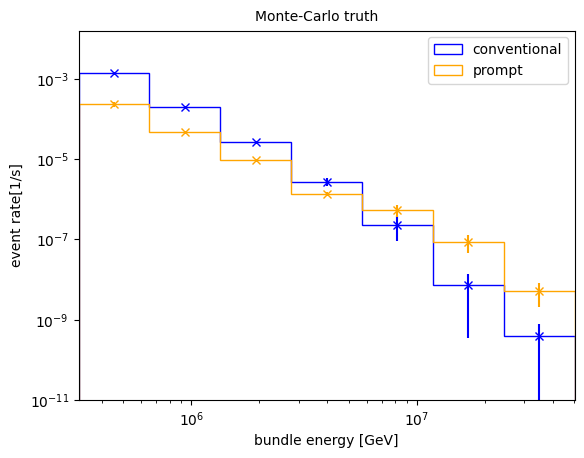

In [ ]:
prompt_conventional_flux_bundle(np.logspace(5.5,7.7,8), df_MCLabelsLeading, df_MCLabelsParent, CorsikaWeightMap.simweights_GaisserH3a)
plt.figtext(0.4,0.9,'Monte-Carlo truth')
plt.ylim([10**(-11),10**(-1.8)])

(1e-11, 0.015848931924611134)

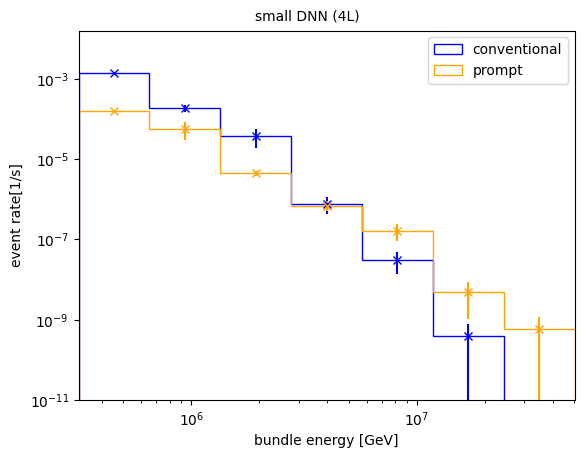

In [ ]:
prompt_conventional_flux_bundle(np.logspace(5.5,7.7,8),df_DNN_energy,df_MCLabelsParent,CorsikaWeightMap.simweights_GaisserH3a)
plt.figtext(0.4,0.9,'small DNN (4L)')
plt.ylim([10**(-11),10**(-1.8)])

(1e-11, 0.015848931924611134)

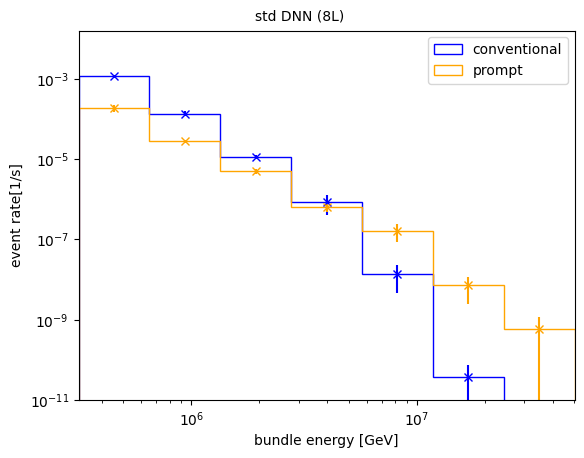

In [ ]:
prompt_conventional_flux_bundle(np.logspace(5.5,7.7,8),df_DNN_energy_m,df_MCLabelsParent,CorsikaWeightMap.simweights_GaisserH3a)
plt.figtext(0.4,0.9,'std DNN (8L)')
plt.ylim([10**(-11),10**(-1.8)])

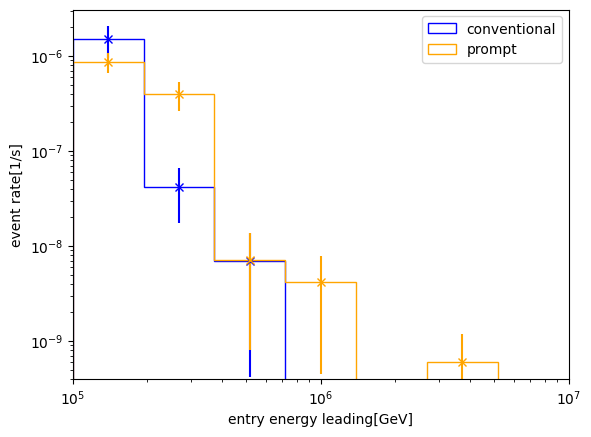

In [ ]:
prompt_conventional_flux_entry(np.logspace(5,7,8),df_DNN_energy,df_MCLabelsParent,CorsikaWeightMap.simweights_GaisserH3a)
#prompt_conventional_flux_entry(np.logspace(1,7,15),df_MCLabelsLeading,df_MCLabelsParent,CorsikaWeightMap.simweights_GaisserH3a)

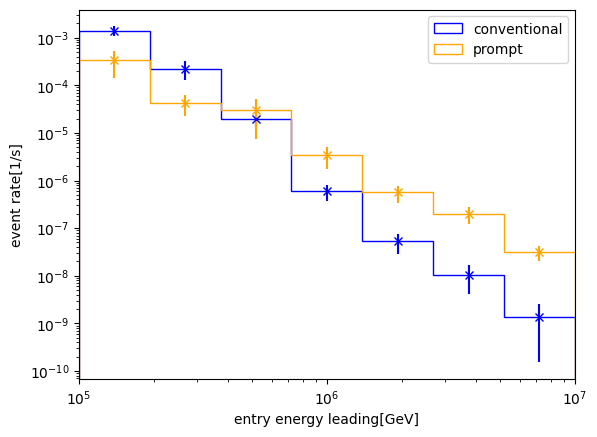

In [ ]:
prompt_conventional_flux_entry(np.logspace(5,7,8),df_MCLabelsLeading,df_MCLabelsParent,CorsikaWeightMap.simweights_GaisserH3a)

<ErrorbarContainer object of 3 artists>

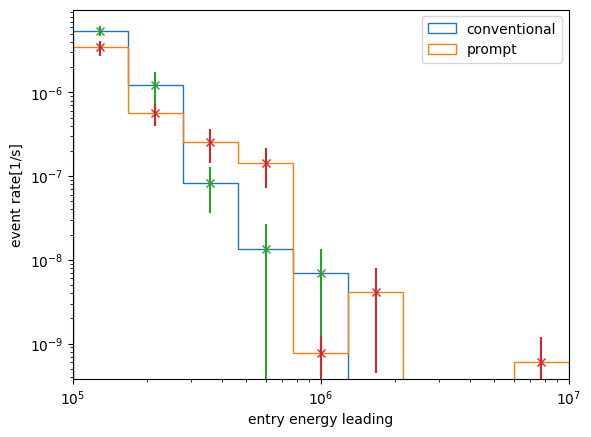

In [ ]:
b=np.logspace(5,7,10)
plt.hist(df_DNN_energy.bundle_energy_at_entry[df_MCLabelsParent.is_prompt_dennis==0]*df_DNN_energy.leading_energy_rel_entry[df_MCLabelsParent.is_prompt_dennis==0],bins=b,histtype='step', log=True, label='conventional', weights=CorsikaWeightMap.simweights_GaisserH3a[df_MCLabelsParent.is_prompt_dennis==0])
plt.hist(df_DNN_energy.bundle_energy_at_entry[df_MCLabelsParent.is_prompt_dennis==1]*df_DNN_energy.leading_energy_rel_entry[df_MCLabelsParent.is_prompt_dennis==1], bins=b, histtype='step',log=True,label='prompt',weights=CorsikaWeightMap.simweights_GaisserH3a[df_MCLabelsParent.is_prompt_dennis==1])
plt.xscale('log')
plt.xlim([10**5,10**7])
plt.xlabel('entry energy leading')
plt.ylabel('event rate[1/s]')
plt.legend()
errors_conventional, error_edges_conventional=bh.numpy.histogram(df_DNN_energy.bundle_energy_at_entry[df_MCLabelsParent.is_prompt_dennis==0]*df_DNN_energy.leading_energy_rel_entry[df_MCLabelsParent.is_prompt_dennis==0],bins=b,weights=CorsikaWeightMap.simweights_GaisserH3a[df_MCLabelsParent.is_prompt_dennis==0]**2)
errors_prompt, errors_edges_prompt=bh.numpy.histogram(df_DNN_energy.bundle_energy_at_entry[df_MCLabelsParent.is_prompt_dennis==1]*df_DNN_energy.leading_energy_rel_entry[df_MCLabelsParent.is_prompt_dennis==1],bins=b,weights=CorsikaWeightMap.simweights_GaisserH3a[df_MCLabelsParent.is_prompt_dennis==1]**2)
conventional_weighted, bins_conv=bh.numpy.histogram(df_DNN_energy.bundle_energy_at_entry[df_MCLabelsParent.is_prompt_dennis==0]*df_DNN_energy.leading_energy_rel_entry[df_MCLabelsParent.is_prompt_dennis==0],bins=b, weights=CorsikaWeightMap.simweights_GaisserH3a[df_MCLabelsParent.is_prompt_dennis==0])
prompt_weighted, bins_prompt=bh.numpy.histogram(df_DNN_energy.bundle_energy_at_entry[df_MCLabelsParent.is_prompt_dennis==1]*df_DNN_energy.leading_energy_rel_entry[df_MCLabelsParent.is_prompt_dennis==1],bins=b, weights=CorsikaWeightMap.simweights_GaisserH3a[df_MCLabelsParent.is_prompt_dennis==1])
mids=10**(np.log10(b)[:(np.size(b)-1)]+np.diff(np.log10(b))/2)
plt.errorbar(mids,conventional_weighted,yerr=np.sqrt(errors_conventional),fmt='x')
plt.errorbar(mids,prompt_weighted,yerr=np.sqrt(errors_prompt),fmt='x')

(1e-11, 0.015848931924611134)

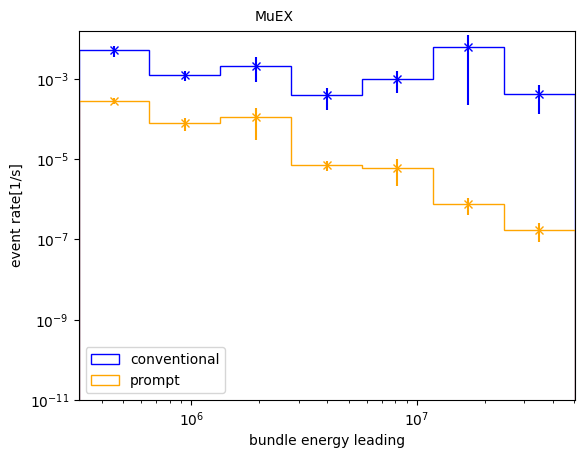

In [ ]:
b2=np.logspace(5.5,7.7,8)
plt.hist(df_energy_MuEX.energy[df_MCLabelsParent.is_prompt_dennis==0],bins=b2,histtype='step', log=True, label='conventional', weights=CorsikaWeightMap.simweights_GaisserH3a[df_MCLabelsParent.is_prompt_dennis==0],color='blue')
plt.hist(df_energy_MuEX.energy[df_MCLabelsParent.is_prompt_dennis==1], bins=b2, histtype='step',log=True,label='prompt', weights=CorsikaWeightMap.simweights_GaisserH3a[df_MCLabelsParent.is_prompt_dennis==1],color='orange')
plt.xscale('log')
plt.xlim([10**5.5,10**7.7])
plt.xlabel('bundle energy leading')
plt.ylabel('event rate[1/s]')
plt.legend()
errors_conventional, error_edges_conventional=bh.numpy.histogram(df_energy_MuEX.energy[df_MCLabelsParent.is_prompt_dennis==0],bins=b2,weights=CorsikaWeightMap.simweights_GaisserH3a[df_MCLabelsParent.is_prompt_dennis==0]**2)
errors_prompt, errors_edges_prompt=bh.numpy.histogram(df_energy_MuEX.energy[df_MCLabelsParent.is_prompt_dennis==1],bins=b2,weights=CorsikaWeightMap.simweights_GaisserH3a[df_MCLabelsParent.is_prompt_dennis==1]**2)
conventional_weighted, bins_conv=bh.numpy.histogram(df_energy_MuEX.energy[df_MCLabelsParent.is_prompt_dennis==0],bins=b2, weights=CorsikaWeightMap.simweights_GaisserH3a[df_MCLabelsParent.is_prompt_dennis==0])
prompt_weighted, bins_prompt=bh.numpy.histogram(df_energy_MuEX.energy[df_MCLabelsParent.is_prompt_dennis==1],bins=b2, weights=CorsikaWeightMap.simweights_GaisserH3a[df_MCLabelsParent.is_prompt_dennis==1])
mids=10**(np.log10(b2)[:(np.size(b2)-1)]+np.diff(np.log10(b2))/2)
plt.errorbar(mids,conventional_weighted,yerr=np.sqrt(errors_conventional),fmt='x',color='blue')
plt.errorbar(mids,prompt_weighted,yerr=np.sqrt(errors_prompt),fmt='x',color='orange')
plt.figtext(0.4,0.9,'MuEX')
plt.ylim([10**(-11),10**(-1.8)])

4.582013934850693e-05

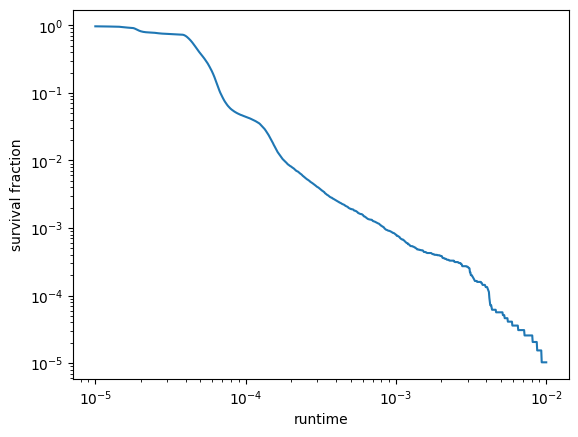

In [ ]:
length=np.logspace(-5,-2,1000)
runtime_survival_write=np.zeros(np.size(length))
for i in range(np.size(length)):
    runtime_survival_write[i]=np.size(df_DNN_energy.runtime_write[df_DNN_energy.runtime_write>=length[i]])/np.size(df_DNN_energy.runtime_write)
plt.plot(length,runtime_survival_write)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('runtime')
plt.ylabel('survival fraction')
np.median(df_DNN_energy.runtime_write)


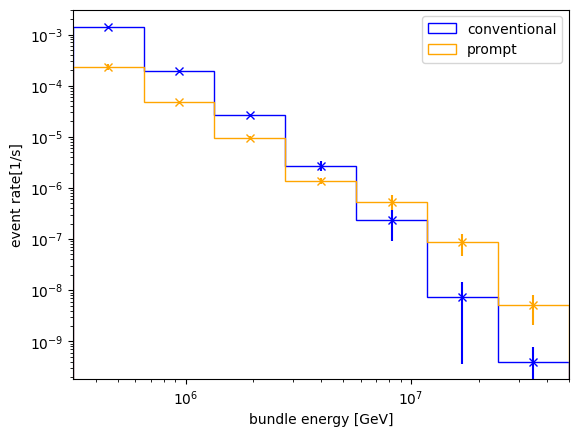

In [ ]:
prompt_conventional_flux_bundle(np.logspace(5.5,7.7,8),df_MCLabelsLeading,df_MCLabelsParent,CorsikaWeightMap.simweights_GaisserH3a)

fraction prompt: 0.442117795363821
fraction over 10**4: 0.3416996088766184


/scratch/lflottau/lf/lib/python3.10/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/scratch/lflottau/lf/lib/python3.10/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Text(0.2, 0.9, 'Correlation leading muon energy smal dnn (c_rel>0.15)')

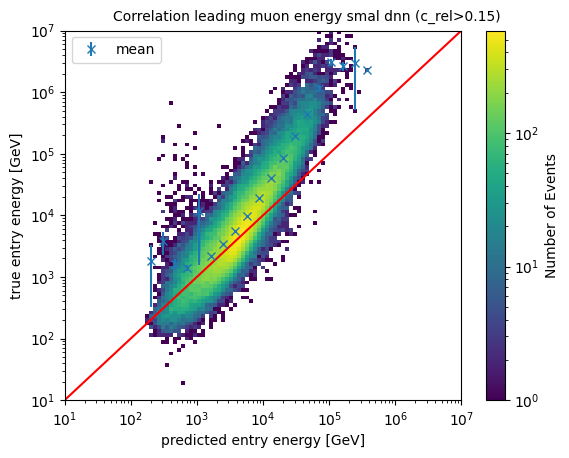

In [ ]:
c_rel=0.15
entry_energy_pred_cut_rel=df_DNN_energy[df_MCLabelsLeading.leading_energy_rel_entry>c_rel]
entry_energy_true_cut_rel=df_MCLabelsLeading[df_MCLabelsLeading.leading_energy_rel_entry>c_rel]
entry_energy_weights_cut_rel=df_weights[df_MCLabelsLeading.leading_energy_rel_entry>c_rel]
entry_energy_Parent_cut_rel=df_MCLabelsParent[df_MCLabelsLeading.leading_energy_rel_entry>c_rel]
plt.hist2d(entry_energy_pred_cut_rel.entry_energy,entry_energy_true_cut_rel.entry_energy,bins=bins_entry,range=[[np.min(entry_energy_true_cut_rel.entry_energy),np.max(entry_energy_true_cut_rel.entry_energy)],[np.min(entry_energy_pred_cut_rel.entry_energy),np.max(entry_energy_pred_cut_rel.entry_energy)]],norm='log')
plt.xlabel('predicted entry energy [GeV]')
plt.ylabel('true entry energy [GeV]')
plt.yscale('log')
plt.xscale('log')
plt.plot(bins_entry,bins_entry,'r')
plt.xlim([10**1,10**7])
plt.ylim([10**1,10**7])
plt.colorbar(label='Number of Events')
print('fraction prompt:',np.size(entry_energy_Parent_cut_rel.is_last_interaction_prompt_00[entry_energy_Parent_cut_rel.is_last_interaction_prompt_00==1])/np.size(df_MCLabelsParent.is_last_interaction_prompt_00[df_MCLabelsParent.is_last_interaction_prompt_00==1]))
print('fraction over 10**4:', np.size(entry_energy_true_cut_rel.entry_energy[entry_energy_true_cut_rel.entry_energy>=10**4])/np.size(df_MCLabelsLeading.entry_energy[df_MCLabelsLeading.entry_energy>=10**4]))
np.size(entry_energy_pred_cut_rel.entry_energy)/np.size(df_DNN_energy.entry_energy)
add_mean_error_entry(entry_energy_pred_cut_rel, entry_energy_true_cut_rel, bins_entry, 3)
scp.stats.spearmanr(entry_energy_pred_cut_rel.entry_energy,entry_energy_true_cut_rel.entry_energy)
plt.figtext(0.2,0.9,'Correlation leading muon energy smal dnn (c_rel>0.15)')

fraction prompt: 0.442117795363821
fraction over 10**5: 0.09783901233338106


0.4791650635846453

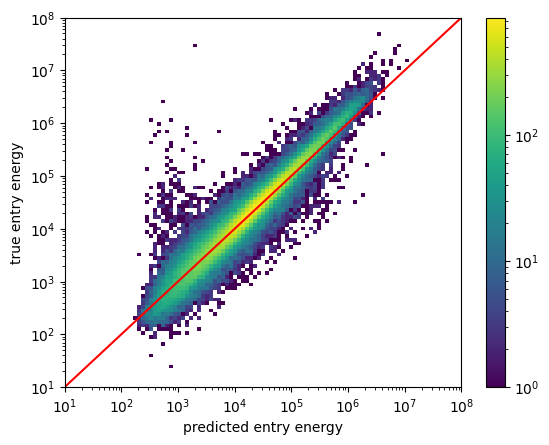

In [ ]:

plt.hist2d(entry_energy_pred_cut_rel.bundle_energy_at_entry,entry_energy_true_cut_rel.bundle_energy_at_entry,bins=bins_bundle,cmin=1,norm='log')
plt.xlabel('predicted entry energy')
plt.ylabel('true entry energy')
plt.yscale('log')
plt.xscale('log')
plt.plot(bins_bundle,bins_bundle,'r')
plt.xlim([10**1,10**8])
plt.ylim([10**1,10**8])
plt.colorbar()
print('fraction prompt:',np.size(entry_energy_Parent_cut_rel.is_last_interaction_prompt_00[entry_energy_Parent_cut_rel.is_last_interaction_prompt_00==1])/np.size(df_MCLabelsParent.is_last_interaction_prompt_00[df_MCLabelsParent.is_last_interaction_prompt_00==1]))
print('fraction over 10**5:', np.size(entry_energy_true_cut_rel.bundle_energy_at_entry[entry_energy_true_cut_rel.bundle_energy_at_entry>=10**5])/np.size(df_MCLabelsLeading.bundle_energy_at_entry[df_MCLabelsLeading.bundle_energy_at_entry>=10**4]))
np.size(entry_energy_pred_cut_rel.entry_energy)/np.size(df_DNN_energy.entry_energy)

In [ ]:
print(np.mean(df_MCLabelsLeading.num_muons_at_entry[df_MCLabelsLeading.leading_energy_rel_entry>=c_rel]))
np.mean(df_MCLabelsLeading.num_muons_at_entry)

125.17064031603627


522.3515699944085

In [ ]:
high_energy=df_MCLabelsLeading[df_MCLabelsLeading.entry_energy>=10**5]
print(np.mean(high_energy.num_muons_at_entry[high_energy.leading_energy_rel_entry>=0.2]))
np.mean(high_energy.num_muons_at_entry)

1012.2856199075094


2054.9581981981983

fraction prompt: 0.4415618448637317
fraction over 10**4: 0.3416996088766184
0.4791650635846453


/scratch/lflottau/lf/lib/python3.10/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/scratch/lflottau/lf/lib/python3.10/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


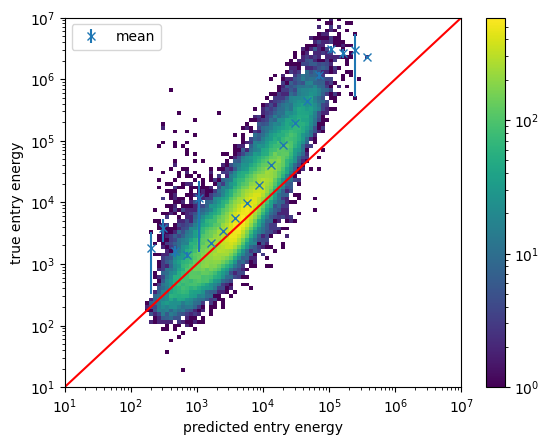

In [ ]:
entry_energy_pred_cut_rel=df_DNN_energy[df_MCLabelsLeading.leading_energy_rel_entry>=0.15]
entry_energy_true_cut_rel=df_MCLabelsLeading[df_MCLabelsLeading.leading_energy_rel_entry>=0.15]
entry_energy_weights_cut_rel=CorsikaWeightMap[df_MCLabelsLeading.leading_energy_rel_entry>=0.15]
entry_energy_Parent_cut_rel=df_MCLabelsParent[df_MCLabelsLeading.leading_energy_rel_entry>=0.15]
plt.hist2d(entry_energy_pred_cut_rel.entry_energy,entry_energy_true_cut_rel.entry_energy,bins=bins_entry,range=[[np.min(entry_energy_true_cut_rel.entry_energy),np.max(entry_energy_true_cut_rel.entry_energy)],[np.min(entry_energy_pred_cut_rel.entry_energy),np.max(entry_energy_pred_cut_rel.entry_energy)]],norm='log')
plt.xlabel('predicted entry energy')
plt.ylabel('true entry energy')
plt.yscale('log')
plt.xscale('log')
plt.plot(bins_entry,bins_entry,'r')
plt.xlim([10**1,10**7])
plt.ylim([10**1,10**7])
plt.colorbar()
print('fraction prompt:',np.size(entry_energy_Parent_cut_rel.is_prompt_dennis[entry_energy_Parent_cut_rel.is_prompt_dennis==1])/np.size(df_MCLabelsParent.is_last_interaction_prompt_00[df_MCLabelsParent.is_prompt_dennis==1]))
print('fraction over 10**4:', np.size(entry_energy_true_cut_rel.entry_energy[entry_energy_true_cut_rel.entry_energy>=10**4])/np.size(df_MCLabelsLeading.entry_energy[df_MCLabelsLeading.entry_energy>=10**4]))
print(np.size(entry_energy_pred_cut_rel.entry_energy)/np.size(df_DNN_energy.entry_energy))
scp.stats.pearsonr(entry_energy_pred_cut_rel.entry_energy,entry_energy_true_cut_rel.entry_energy)
add_mean_error_entry(entry_energy_pred_cut_rel,entry_energy_true_cut_rel,bins_entry,3)

Text(0.4, 0.9, 'Monte-Carlo truth')

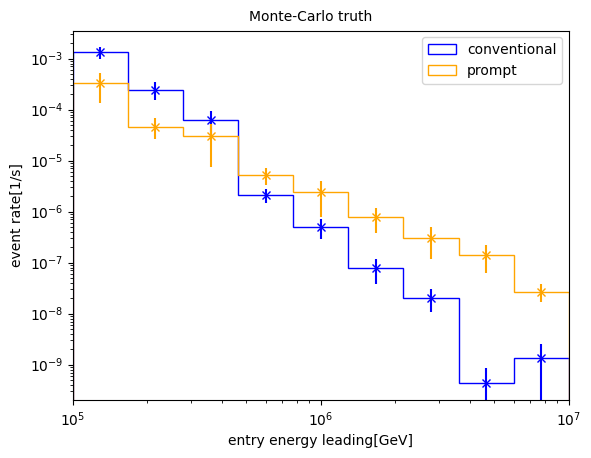

In [ ]:
prompt_conventional_flux_entry(np.logspace(5,7,10),df_MCLabelsLeading,df_MCLabelsParent,CorsikaWeightMap.simweights_GaisserH3a)
plt.figtext(0.4,0.9,'Monte-Carlo truth')

(1e-10, 0.0031622776601683794)

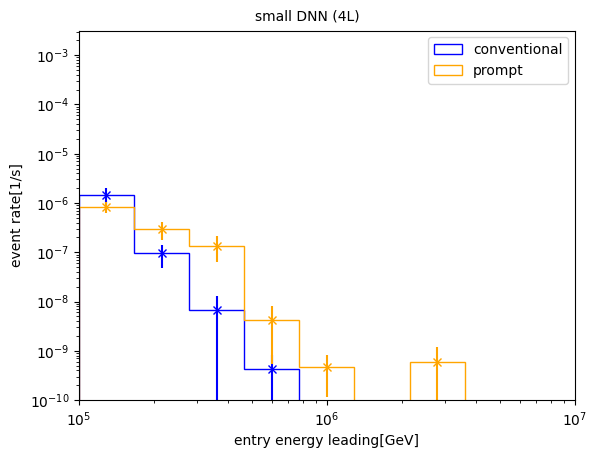

In [ ]:
prompt_conventional_flux_entry(np.logspace(5,7,10),df_DNN_energy,df_MCLabelsParent,CorsikaWeightMap.simweights_GaisserH3a)
plt.figtext(0.4,0.9,'small DNN (4L)')
plt.ylim([10**(-10),10**(-2.5)])

(1e-10, 0.0031622776601683794)

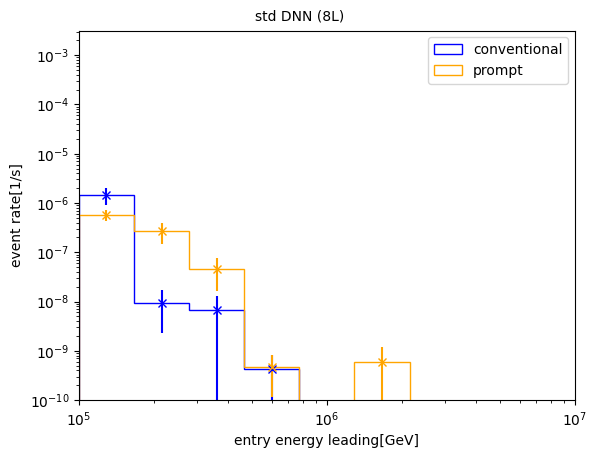

In [ ]:
prompt_conventional_flux_entry(np.logspace(5,7,10),df_DNN_energy_m,df_MCLabelsParent,CorsikaWeightMap.simweights_GaisserH3a)
plt.figtext(0.4,0.9,'std DNN (8L)')
plt.ylim([10**(-10),10**(-2.5)])

(1e-12, 0.03162277660168379)

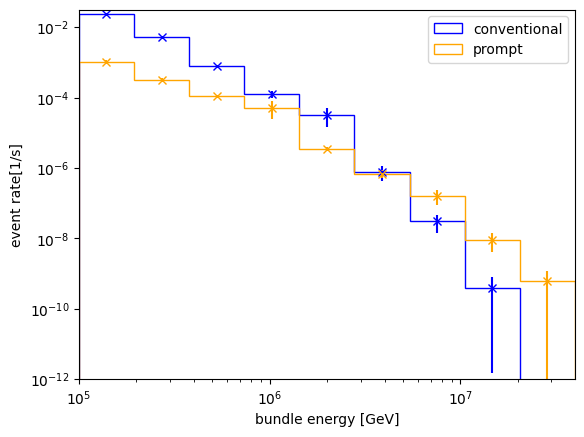

In [ ]:
prompt_conventional_flux_bundle(np.logspace(5,7.6,10),df_DNN_energy,df_MCLabelsParent,CorsikaWeightMap.simweights_GaisserH3a)
#prompt_conventional_flux_bundle(np.logspace(5,7.6,10),df_MCLabelsLeading,df_MCLabelsParent,CorsikaWeightMap.simweights_GaisserH3a)
plt.ylim([10**(-12),10**(-1.5)])

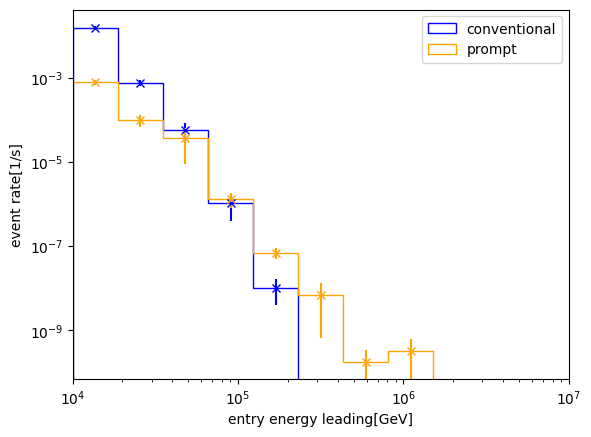

In [ ]:
prompt_conventional_flux_entry(np.logspace(4,7,12),entry_energy_pred_cut_rel,entry_energy_Parent_cut_rel,entry_energy_weights_cut_rel.simweights_GaisserH3a)

fraction prompt: 0.8755515092093283
fraction over 10**4: 0.8981719687937922
fraction total 0.9500043603830981


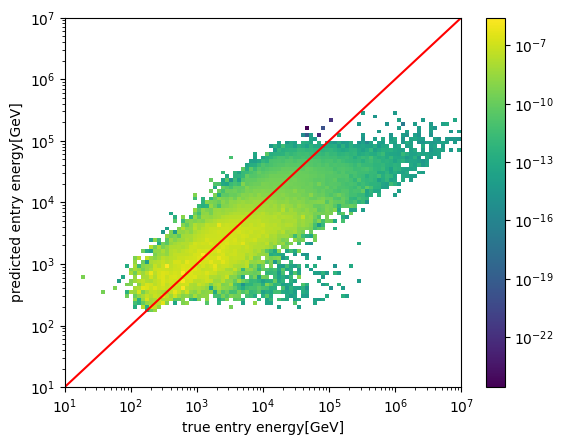

In [ ]:
multiplicity_cut=np.quantile(df_MCLabelsLeading.num_muons_at_entry,0.95)
multiplicity_cut_mask=df_MCLabelsLeading.num_muons_at_entry<=multiplicity_cut
entry_energy_pred_cut_mult=df_DNN_energy[multiplicity_cut_mask]
entry_energy_true_cut_mult=df_MCLabelsLeading[multiplicity_cut_mask]
entry_energy_weights_cut_mult=df_weights[multiplicity_cut_mask]
entry_energy_Parent_cut_mult=df_MCLabelsParent[multiplicity_cut_mask]
plt.hist2d(entry_energy_true_cut_mult.entry_energy,entry_energy_pred_cut_mult.entry_energy,bins=bins_entry,range=[[np.min(entry_energy_true_cut_mult.entry_energy),np.max(entry_energy_true_cut_mult.entry_energy)],[np.min(entry_energy_pred_cut_mult.entry_energy),np.max(entry_energy_pred_cut_mult.entry_energy)]],weights=entry_energy_weights_cut_mult.GaisserH3aWeight,norm='log')
plt.xlabel('true entry energy[GeV]')
plt.ylabel('predicted entry energy[GeV]')
plt.yscale('log')
plt.xscale('log')
plt.plot(bins_entry,bins_entry,'r')
plt.xlim([10**1,10**7])
plt.ylim([10**1,10**7])
plt.colorbar()
print('fraction prompt:',np.size(entry_energy_Parent_cut_mult.is_last_interaction_prompt_00[entry_energy_Parent_cut_mult.is_last_interaction_prompt_00==1])/np.size(df_MCLabelsParent.is_last_interaction_prompt_00[df_MCLabelsParent.is_last_interaction_prompt_00==1]))
print('fraction over 10**4:', np.size(entry_energy_true_cut_mult.entry_energy[entry_energy_true_cut_mult.entry_energy>=10**4])/np.size(df_MCLabelsLeading.entry_energy[df_MCLabelsLeading.entry_energy>=10**4]))
print('fraction total', np.size(entry_energy_true_cut_mult.entry_energy)/np.size(df_MCLabelsLeading.entry_energy))

In [ ]:
true_bundle_digitized=np.digitize(df_MCLabelsLeading.bundle_energy_at_entry, bins_bundle)-1
A=np.ones([np.size(bins_bundle),np.size(bins_bundle)])
f=np.ones(np.size(bins_bundle)-1)
for i in range(np.size(bins_bundle)-1):
    predicted_bin_i_digitized=np.digitize(df_DNN_energy.bundle_energy_at_entry[true_bundle_digitized==i], bins_bundle)-1
    #print(np.size(predicted_bin_i_digitized))
    f[i]=np.size(predicted_bin_i_digitized)
    for j in range(np.size(bins_bundle)):
        x=1
        #print(np.size(predicted_bin_i_digitized[predicted_bin_i_digitized==j]))
        #A[j,i]=np.size(predicted_bin_i_digitized[predicted_bin_i_digitized==j])/np.size(predicted_bin_i_digitized)

In [ ]:
random=np.random.uniform(size=np.size(df_MCLabelsLeading.bundle_energy_at_entry))

In [ ]:
df_MCLabelsLeading_test=df_MCLabelsLeading[random<=0.5]
df_DNN_energy_test=df_DNN_energy[random<=0.5]
df_MCLabelsLeading_train=df_MCLabelsLeading[random>0.5]
df_DNN_energy_train=df_DNN_energy[random>0.5]
A, xb, yb=np.histogram2d(df_DNN_energy_train.bundle_energy_at_entry,df_MCLabelsLeading_train.bundle_energy_at_entry,bins=bins_bundle)
As=np.sum(A,axis=0)
for i in range(np.size(bins_bundle)-1):
    if As[i]!=0:
        A[:,i]=A[:,i]/As[i]
#As    


In [ ]:
f,xb=np.histogram(df_MCLabelsLeading_train.bundle_energy_at_entry, bins=bins_bundle)
g,xb=np.histogram(df_DNN_energy_train.bundle_energy_at_entry, bins=bins_bundle)
#print(g)
#A@f

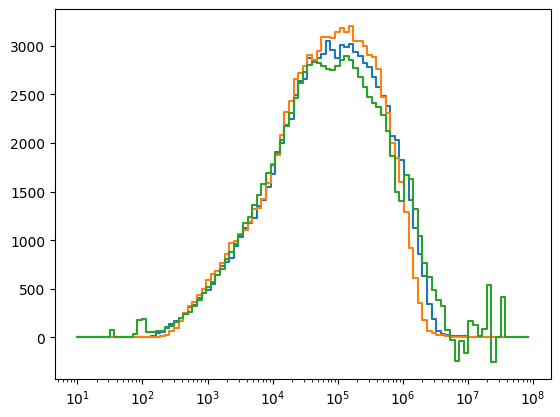

In [ ]:
Ainv=np.linalg.pinv(A,0.4)
f_test,b_test=np.histogram(df_MCLabelsLeading_test.bundle_energy_at_entry,bins=bins_bundle)
g_test,b_test=np.histogram(df_DNN_energy_test.bundle_energy_at_entry,bins=bins_bundle)
plt.xscale('log')
#plt.hist(df_MCLabelsLeading_test.bundle_energy_at_entry,bins=bins_bundle, histtype='step')
plt.step(bins_bundle[:99],f_test,where='post')
plt.step(bins_bundle[:99],g_test,where='post')
plt.step(bins_bundle[:99],Ainv@f_test)

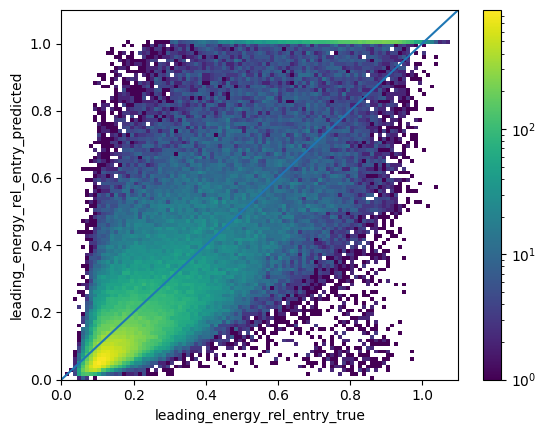

In [ ]:
rel_entry_cut=df_DNN_energy.leading_energy_rel_entry_uncertainty/df_DNN_energy.leading_energy_rel_entry<=0.9
rel_entry_cut_DNN=df_DNN_energy[rel_entry_cut]
rel_entry_cut_MCLabels=df_MCLabelsLeading[rel_entry_cut]
rel_entry_cut_Parent=df_MCLabelsParent[rel_entry_cut]
rel_entry_cut_weights=df_weights[rel_entry_cut]
plt.hist2d(rel_entry_cut_DNN.leading_energy_rel_entry,rel_entry_cut_MCLabels.leading_energy_rel_entry,bins=np.linspace(0,1.1,100),range=[[0,1.1],[0,1.1]],norm='log')
plt.xlabel('leading_energy_rel_entry_true')
plt.ylabel('leading_energy_rel_entry_predicted')
#plt.xscale('log')
#plt.yscale('log')
plt.plot(np.linspace(0,1.1),np.linspace(0,1.1))
plt.colorbar()
print()


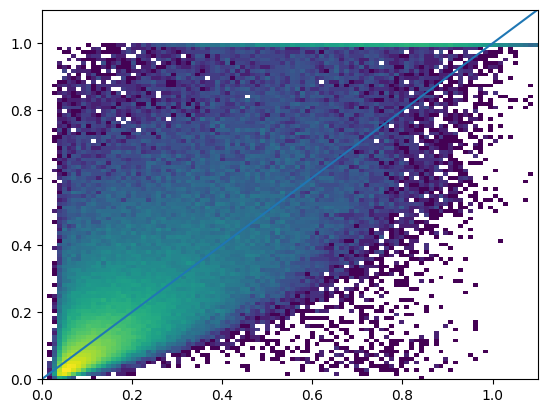

In [ ]:
plt.hist2d(df_DNN_energy.entry_energy/df_DNN_energy.bundle_energy_at_entry,df_MCLabelsLeading.leading_energy_rel_entry,norm='log',bins=100,range=[[0,1.1],[0,1.1]])
plt.plot(np.linspace(0,1.1),np.linspace(0,1.1))

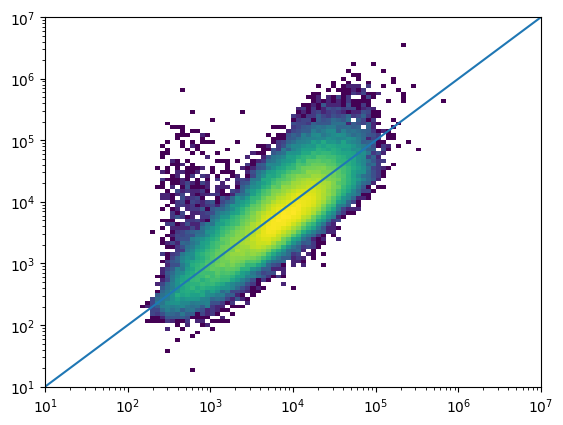

In [ ]:
plt.hist2d(rel_entry_cut_DNN.bundle_energy_at_entry*rel_entry_cut_DNN.leading_energy_rel_entry,rel_entry_cut_MCLabels.entry_energy,range=[[0,10**7],[0,10**7]],norm='log',bins=np.logspace(1,7,100))
plt.xscale('log')
plt.yscale('log')
plt.plot(bins_entry,bins_entry)

/scratch/lflottau/lf/lib/python3.10/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/scratch/lflottau/lf/lib/python3.10/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


p= 0.31365566834641545
PearsonRResult(statistic=0.31365566834641545, pvalue=0.0)
SignificanceResult(statistic=0.8441562911417175, pvalue=0.0)


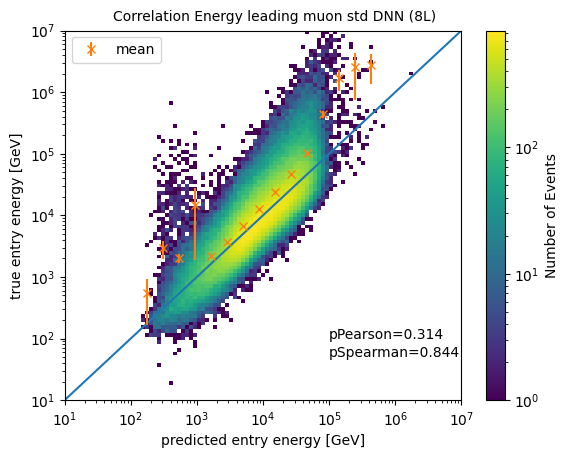

In [ ]:
plt.hist2d(df_DNN_energy_m.entry_energy,df_MCLabelsLeading.entry_energy,bins=bins_entry,range=[[np.min(df_DNN_energy_m.entry_energy),np.max(df_DNN_energy_m.entry_energy)],[np.min(df_MCLabelsLeading.entry_energy),np.max(df_MCLabelsLeading.entry_energy)]],cmin=1,norm='log')
plt.xlabel('predicted entry energy [GeV]')
plt.ylabel('true entry energy [GeV]')
plt.yscale('log')
plt.xscale('log')
plt.plot(bins_entry,bins_entry)
plt.xlim([10**1,10**7])
plt.ylim([10**1,10**7])
plt.figtext(0.2,0.9,'Correlation Energy leading muon std DNN (8L)')
plt.colorbar(label='Number of Events')
np.size(df_MCLabelsLeading.entry_energy)
add_mean_error_entry(df_DNN_energy_m, df_MCLabelsLeading, bins_entry, 4)
print('p=',np.corrcoef(df_DNN_energy_m.entry_energy[entry_finite],df_MCLabelsLeading.entry_energy[entry_finite])[0,1])
plt.text(10**5,10**2,'pPearson=0.314')
plt.text(10**5,10**1.7,'pSpearman=0.844')
print(scp.stats.pearsonr(df_DNN_energy_m.entry_energy[entry_finite],df_MCLabelsLeading.entry_energy[entry_finite]))
print(scp.stats.spearmanr(df_DNN_energy_m.entry_energy[entry_finite],df_MCLabelsLeading.entry_energy[entry_finite]))

p= [[1.        0.8846665]
 [0.8846665 1.       ]]
SignificanceResult(statistic=0.982349852335897, pvalue=0.0)


/scratch/lflottau/lf/lib/python3.10/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/scratch/lflottau/lf/lib/python3.10/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/scratch/lflottau/lf/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


0     -1.004111
1     -0.064603
2     -0.088230
3     -0.119828
4     -0.097296
         ...   
477    0.041783
478    0.316182
479   -0.114298
480    0.008334
481   -0.064026
Name: bundle_energy_at_entry, Length: 194937, dtype: float64
True
-0.05240515950995047


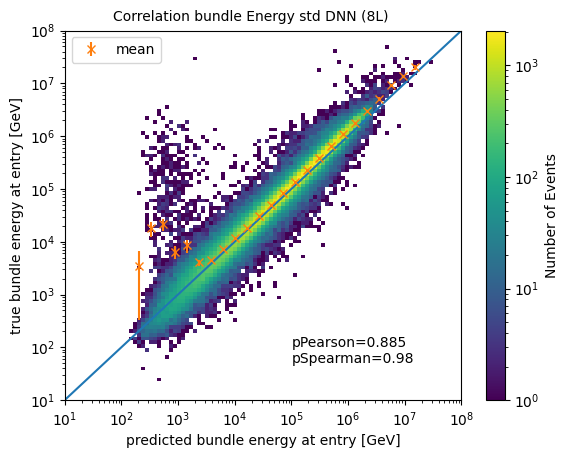

In [ ]:
bins_bundle=np.logspace(1,8,100)
plt.hist2d(df_DNN_energy_m.bundle_energy_at_entry,df_MCLabelsLeading.bundle_energy_at_entry,bins=bins_bundle,norm='log')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('predicted bundle energy at entry [GeV]')
plt.ylabel('true bundle energy at entry [GeV]')
plt.xlim([10**1,10**8])
plt.ylim([10**1,10**8])
plt.figtext(0.2,0.9,'Correlation bundle Energy std DNN (8L)')
plt.colorbar(label='Number of Events')
plt.plot(bins_bundle,bins_bundle)
print('p=',np.corrcoef(df_DNN_energy_m.bundle_energy_at_entry, df_MCLabelsLeading.bundle_energy_at_entry))
print(scp.stats.spearmanr(df_DNN_energy_m.bundle_energy_at_entry, df_MCLabelsLeading.bundle_energy_at_entry))
add_mean_error_bundle(df_DNN_energy_m, df_MCLabelsLeading, bins_bundle, 3)
plt.text(10**5,10**2,'pPearson=0.885')
plt.text(10**5,10**1.7, 'pSpearman=0.98')
print(np.log10(df_DNN_energy_b.bundle_energy_at_entry)-np.log10(df_MCLabelsLeading.bundle_energy_at_entry))
#print(np.any(np.isfinite((np.log10(df_DNN_energy_b.bundle_energy_at_entry)-np.log10(df_MCLabelsLeading.bundle_energy_at_entry))==False)))
print(np.any(np.isinf(np.log10(df_DNN_energy_b.bundle_energy_at_entry)-np.log10(df_MCLabelsLeading.bundle_energy_at_entry))))
print(np.mean((np.log10(df_DNN_energy_b.bundle_energy_at_entry)-np.log10(df_MCLabelsLeading.bundle_energy_at_entry))[np.isfinite(np.log10(df_DNN_energy_b.bundle_energy_at_entry)-np.log10(df_MCLabelsLeading.bundle_energy_at_entry))]))

Text(0.5, 0, 'T_small_DNN/T_std_DNN')

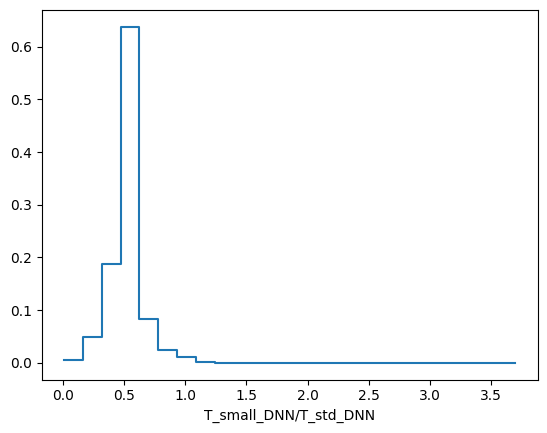

In [ ]:

np.mean(df_DNN_energy.runtime_prediction/df_DNN_energy_m.runtime_prediction)
T_Verhältnis,b_T=bh.numpy.histogram(df_DNN_energy.runtime_prediction/df_DNN_energy_m.runtime_prediction,bins=25)
plt.step(b_T[:np.size(b_T)-1],T_Verhältnis/np.size(df_DNN_energy.runtime_prediction),where='post')
plt.xlabel('T_small_DNN/T_std_DNN')
#plt.xscale('log')

In [ ]:
residuals_entry=df_MCLabelsLeading.entry_energy-df_DNN_energy.entry_energy
print('mean(residuals small):', np.mean(residuals_entry))
print('std(residuals small):', np.std(residuals_entry))
residuals_entry_m=df_MCLabelsLeading.entry_energy-df_DNN_energy_m.entry_energy
print('mean(residuals):', np.mean(residuals_entry_m))
print('std(residuals):', np.std(residuals_entry_m))

mean(residuals small): 14798.0403121369
std(residuals small): 173914.51892346307
mean(residuals): 15342.323010492735
std(residuals): 174344.08839103824


In [ ]:
residuals_bundle=df_MCLabelsLeading.bundle_energy_at_entry-df_DNN_energy.bundle_energy_at_entry
print('mean(residuals bundle small):', np.mean(residuals_bundle))
print('std(residuals bundle small):', np.std(residuals_bundle))
residuals_bundle_m=df_MCLabelsLeading.bundle_energy_at_entry-df_DNN_energy_m.bundle_energy_at_entry
print('mean(residuals):', np.mean(residuals_bundle_m))
print('std(residuals):', np.std(residuals_bundle_m))

mean(residuals bundle small): 61352.900367067756
std(residuals bundle small): 308064.13596702245
mean(residuals): 63490.54248415482
std(residuals): 302976.997745142


mean: -3.981880343122024e+19
std: 1.2045307208834159e+25
SignificanceResult(statistic=0.9336557819338643, pvalue=0.0)


Text(100000, 100, 'pSpearman=0.934')

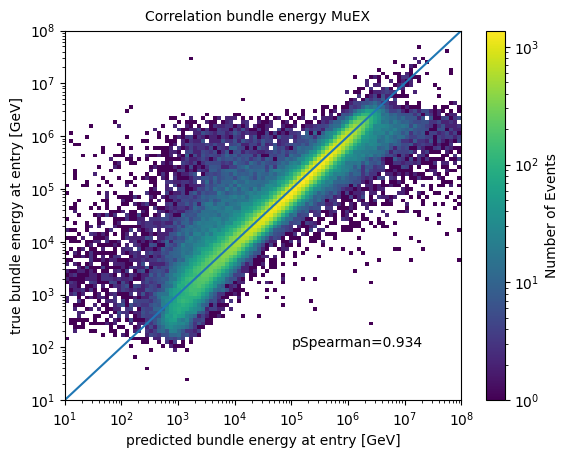

In [ ]:
plt.hist2d(df_energy_MuEX.energy,df_MCLabelsLeading.bundle_energy_at_entry,bins=np.logspace(1,8,100),cmin=1, norm='log')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('predicted bundle energy at entry [GeV]')
plt.ylabel('true bundle energy at entry [GeV]')
plt.xlim([10**1,10**8])
plt.ylim([10**1,10**8])
plt.figtext(0.25,0.9,'Correlation bundle energy MuEX')
plt.colorbar(label='Number of Events')
plt.plot(bins_bundle,bins_bundle)
print('mean:', np.average(df_MCLabelsLeading.bundle_energy_at_entry-df_energy_MuEX.energy,weights=CorsikaWeightMap.simweights_GaisserH3a))
print('std:', np.std(df_MCLabelsLeading.bundle_energy_at_entry-df_energy_MuEX.energy))
print(scp.stats.spearmanr(df_MCLabelsLeading.bundle_energy_at_entry,df_energy_MuEX.energy))
#under, bi, digitized=scp.stats.binned_statistic(df_MCLabelsLeading.bundle_energy_at_entry,df_energy_MuEX.energy,bins=np.logspace(2,8,100),statistic=under_5)
#over, bi, digitized=scp.stats.binned_statistic(df_MCLabelsLeading.bundle_energy_at_entry,df_energy_MuEX.energy,bins=np.logspace(2,8,100),statistic=over_5)
under, bi, digitized=scp.stats.binned_statistic(df_energy_MuEX.energy,df_MCLabelsLeading.bundle_energy_at_entry,bins=np.logspace(2,8,100),statistic=under_5)
over, bi, digitized=scp.stats.binned_statistic(df_energy_MuEX.energy,df_MCLabelsLeading.bundle_energy_at_entry,bins=np.logspace(2,8,100),statistic=over_5)
#plt.plot(mid(np.logspace(2,8,100)),under,color='red')
#plt.plot(mid(np.logspace(2,8,100)),over,color='red')
plt.text(10**5,10**2,'pSpearman=0.934')

mean: -3.981880343122024e+19
std: 1.2045307208834159e+25
SignificanceResult(statistic=0.9336557819338643, pvalue=0.0)
nan


/scratch/lflottau/lf/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/scratch/lflottau/lf/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Text(0.25, 0.9, 'Correlation bundle energy MuEX')

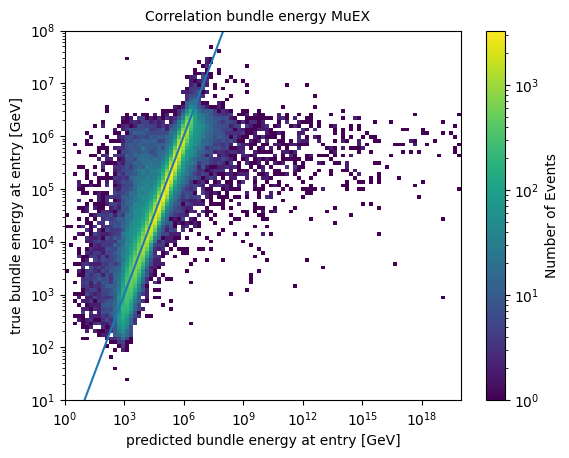

In [ ]:
plt.hist2d(df_energy_MuEX.energy,df_MCLabelsLeading.bundle_energy_at_entry,bins=[np.logspace(0,20,100),np.logspace(1,8,100)],cmin=1, norm='log')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('predicted bundle energy at entry [GeV]')
plt.ylabel('true bundle energy at entry [GeV]')
#plt.xlim([10**0,10**20])
plt.ylim([10**1,10**8])
#plt.figtext(0.25,0.9,'Correlation bundle energy MuEX')
plt.colorbar(label='Number of Events')
plt.plot(bins_bundle,bins_bundle)
print('mean:', np.average(df_MCLabelsLeading.bundle_energy_at_entry-df_energy_MuEX.energy,weights=CorsikaWeightMap.simweights_GaisserH3a))
print('std:', np.std(df_MCLabelsLeading.bundle_energy_at_entry-df_energy_MuEX.energy))
print(scp.stats.spearmanr(df_MCLabelsLeading.bundle_energy_at_entry,df_energy_MuEX.energy))
print(np.nanmean(np.log10(df_energy_MuEX.energy)-np.log10(df_MCLabelsLeading.bundle_energy_at_entry)))
plt.figtext(0.25,0.9,'Correlation bundle energy MuEX')

0.043243243243243246


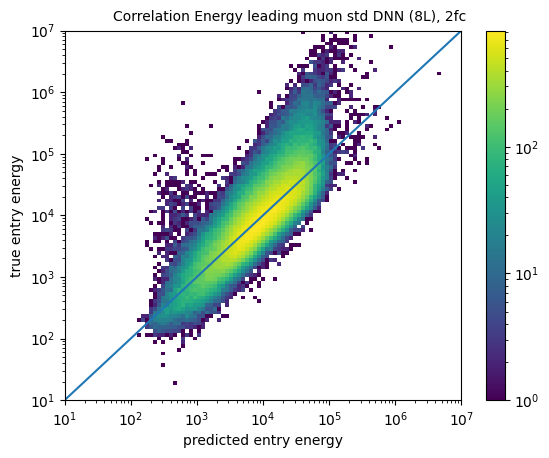

In [ ]:
plt.hist2d(df_DNN_energy_b.entry_energy,df_MCLabelsLeading.entry_energy,bins=bins_entry,range=[[np.min(df_MCLabelsLeading.entry_energy),np.max(df_MCLabelsLeading.entry_energy)],[np.min(df_DNN_energy_b.entry_energy),np.max(df_DNN_energy_b.entry_energy)]],cmin=1,norm='log')
plt.xlabel('predicted entry energy')
plt.ylabel('true entry energy')
plt.yscale('log')
plt.xscale('log')
plt.plot(bins_entry,bins_entry)
plt.xlim([10**1,10**7])
plt.ylim([10**1,10**7])
plt.figtext(0.2,0.9,'Correlation Energy leading muon std DNN (8L), 2fc')
plt.colorbar()
np.size(df_MCLabelsLeading.entry_energy)
print(np.size(df_DNN_energy_b.entry_energy[df_DNN_energy_b.entry_energy>=10**5])/np.size(df_MCLabelsLeading.entry_energy[df_MCLabelsLeading.entry_energy>=10**5]))

0.24792792792792792


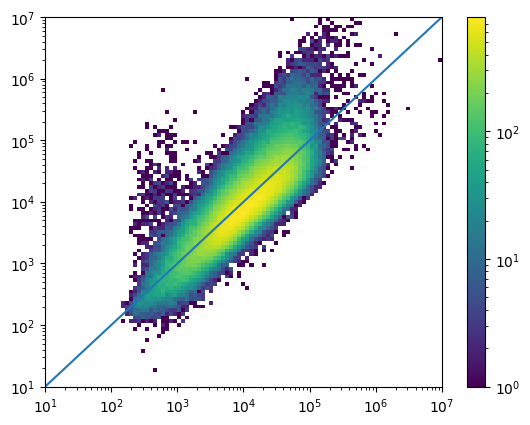

In [ ]:
plt.hist2d(df_DNN_energy_b.bundle_energy_at_entry*df_DNN_energy_b.leading_energy_rel_entry,df_MCLabelsLeading.entry_energy,norm='log',bins=bins_entry)
plt.xscale('log')
plt.yscale('log')
plt.plot(bins_entry,bins_entry)
plt.colorbar()
print(np.size((df_DNN_energy_b.bundle_energy_at_entry*df_DNN_energy_b.leading_energy_rel_entry)[df_DNN_energy_b.bundle_energy_at_entry*df_DNN_energy_b.leading_energy_rel_entry>=10**5])/np.size(df_MCLabelsLeading.entry_energy[df_MCLabelsLeading.entry_energy>=10**5]))

In [ ]:
x=np.array([])
y=np.array([])
xb=np.array([])
yb=np.array([])
dz=np.array([])
z=np.zeros(99**2)
B,unnötig,unnötig2=np.histogram2d(df_DNN_energy.bundle_energy_at_entry,df_MCLabelsLeading.bundle_energy_at_entry,bins=bins_bundle)
for i in range(np.size(bins_bundle)-1):
    x=np.append(x,np.ones(np.size(bins_bundle)-1)*bins_bundle[i])
    y=np.append(y,bins_bundle[:99])
    xb=np.append(xb,np.diff(bins_bundle))
    yb=np.append(yb,np.ones(99)*np.diff(bins_bundle)[i])
    dz=np.append(dz,B[:,i])

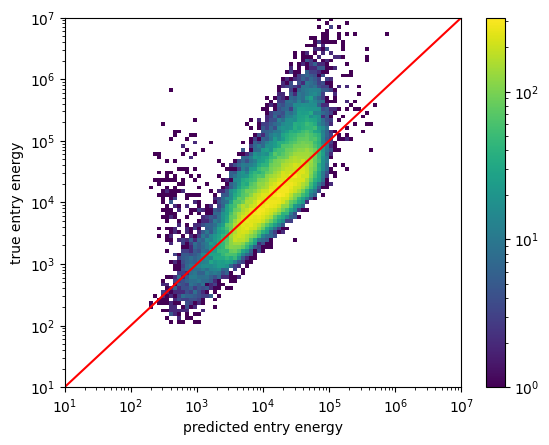

In [ ]:
direction_mask=df_MCLabelsLeading.PrimaryZenith<=0.8
entry_energy_pred_cut_dir=df_DNN_energy[direction_mask]
entry_energy_true_cut_dir=df_MCLabelsLeading[direction_mask]
entry_energy_weights_cut_dir=df_weights[direction_mask]
entry_energy_Parent_cut_dir=df_MCLabelsParent[direction_mask]
plt.hist2d(entry_energy_pred_cut_dir.entry_energy,entry_energy_true_cut_dir.entry_energy,bins=bins_entry,range=[[np.min(entry_energy_pred_cut_dir.entry_energy),np.max(entry_energy_pred_cut_dir.entry_energy)],[np.min(entry_energy_true_cut_dir.entry_energy),np.max(entry_energy_true_cut_dir.entry_energy)]],cmin=1,norm='log')
plt.xlabel('predicted entry energy')
plt.ylabel('true entry energy')
plt.yscale('log')
plt.xscale('log')
plt.plot(bins_entry,bins_entry,'r')
plt.xlim([10**1,10**7])
plt.ylim([10**1,10**7])
plt.colorbar()


In [ ]:
def cut(mask,df_DNN,entry,bundle):
    pred_cut=df_DNN[mask]
    true_cut=df_MCLabelsLeading[mask]
    weights_cut=CorsikaWeightMap[mask]
    Parent_cut=df_MCLabelsParent[mask]
    pred_high_entry=Parent_cut[pred_cut.entry_energy>=10**5]
    pred_high_bundle=Parent_cut[pred_cut.bundle_energy_at_entry>=10**5]
    high_entry=df_MCLabelsParent[df_DNN.entry_energy>=10**5]
    high_bundle=df_MCLabelsParent[df_DNN.bundle_energy_at_entry>=10**5]
    print('fraction total cut:', np.size(pred_cut.entry_energy)/np.size(df_DNN.entry_energy))
    print('fraction prompt cut:', np.size(pred_cut.entry_energy[Parent_cut.is_prompt_dennis==1])/np.size(df_DNN.entry_energy[df_MCLabelsParent.is_prompt_dennis==1]))
    if entry==1:
        print('fraction entry prompt over 10**5:', np.size(pred_high_entry.is_prompt_dennis[pred_high_entry.is_prompt_dennis==1])/np.size(high_entry.is_prompt_dennis[high_entry.is_prompt_dennis==1]))
    if bundle==1:
        print('fraction bundle prompt over 10**5:', np.size(pred_high_bundle.is_prompt_dennis[pred_high_bundle.is_prompt_dennis==1])/np.size(high_bundle.is_prompt_dennis[high_bundle.is_prompt_dennis==1]))    
    return pred_cut,true_cut,weights_cut,Parent_cut

In [ ]:
bundle_pred_cut2_m,bundle_true_cut2_m,bundle_weights_cut2_m,bundle_Parent_cut2_m=cut(df_DNN_energy_m.bundle_energy_at_entry_log_uncertainty<=0.48,df_DNN_energy_m,0,1)
def correlation_plot(pred: pd.DataFrame,true: pd.DataFrame,min1,max1,type1):
    bins=np.logspace(min1,max1,100)
    if type1==1:
        plt.hist2d(pred.bundle_energy_at_entry,true.bundle_energy_at_entry,bins=bins_bundle,norm='log')
        plt.xlabel('predicted bundle energy at entry [GeV]')
        plt.ylabel('true bundle energy at entry [GeV]')
    if type1==0:
        plt.hist2d(pred.entry_energy,true.entry_energy,bins=bins,norm='log')
        plt.xlabel('predicted entry energy [GeV]')
        plt.ylabel('true entry energy [GeV]')
    plt.yscale('log')
    plt.xscale('log')
    plt.xlim([10**min1,10**max1])
    plt.ylim([10**min1,10**max1])
    plt.colorbar(label='Number of Events')
    plt.plot(bins,bins)
def correlation_plot_weighted(pred: pd.DataFrame,true: pd.DataFrame,weights,min1,max1,type1):
    bins=np.logspace(min1,max1,100)
    if type1==1:
        plt.hist2d(pred.bundle_energy_at_entry,true.bundle_energy_at_entry,weights=weights,bins=bins_bundle,norm='log')
        plt.xlabel('predicted bundle energy at entry [GeV]')
        plt.ylabel('true bundle energy at entry [GeV]')
    if type1==0:
        plt.hist2d(pred.entry_energy,true.entry_energy,weights=weights,bins=bins,norm='log')
        plt.xlabel('predicted entry energy [GeV]')
        plt.ylabel('true entry energy [GeV]')
    plt.yscale('log')
    plt.xscale('log')
    plt.xlim([10**min1,10**max1])
    plt.ylim([10**min1,10**max1])
    plt.colorbar(label='Number of Events')
    plt.plot(bins,bins)


fraction total cut: 0.8581798221989668
fraction prompt cut: 0.8992837176799441
fraction bundle prompt over 10**5: 0.9337175792507204


/scratch/lflottau/lf/lib/python3.10/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/scratch/lflottau/lf/lib/python3.10/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


PearsonRResult(statistic=0.9356716741510651, pvalue=0.0)
SignificanceResult(statistic=0.9909133546239748, pvalue=0.0)


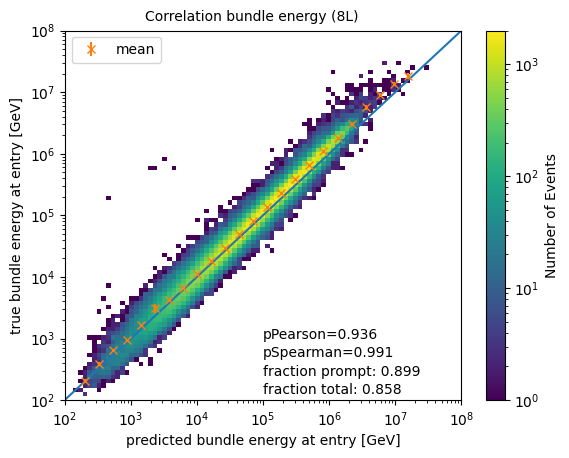

In [ ]:
correlation_plot(bundle_pred_cut2_m,bundle_true_cut2_m,2,8,1)
add_mean_error_bundle(bundle_pred_cut2_m,bundle_true_cut2_m,np.logspace(1,8,100),3)
plt.figtext(0.25,0.9,'Correlation bundle energy (8L)')
plt.text(10**5,10**3,'pPearson=0.936')
plt.text(10**5,10**2.4,'fraction prompt: 0.899')
plt.text(10**5,10**2.1,'fraction total: 0.858')
plt.text(10**5,10**2.7,'pSpearman=0.991')
print(scp.stats.pearsonr(bundle_pred_cut2_m.bundle_energy_at_entry,bundle_true_cut2_m.bundle_energy_at_entry))
print(scp.stats.spearmanr(bundle_pred_cut2_m.bundle_energy_at_entry,bundle_true_cut2_m.bundle_energy_at_entry))
#print(np.corrcoef(df_DNN_energy.bundle_energy_at_entry,df_MCLabelsLeading.bundle_energy_at_entry,rowvar=False))
#print(np.corrcoef(df_energy_MuEX.energy,df_MCLabelsLeading.bundle_energy_at_entry))
#print(np.corrcoef(df_DNN_energy.entry_energy[np.isfinite(df_MCLabelsLeading.entry_energy)],df_MCLabelsLeading.entry_energy[np.isfinite(df_MCLabelsLeading.entry_energy)]))

(1e-11, 0.015848931924611134)

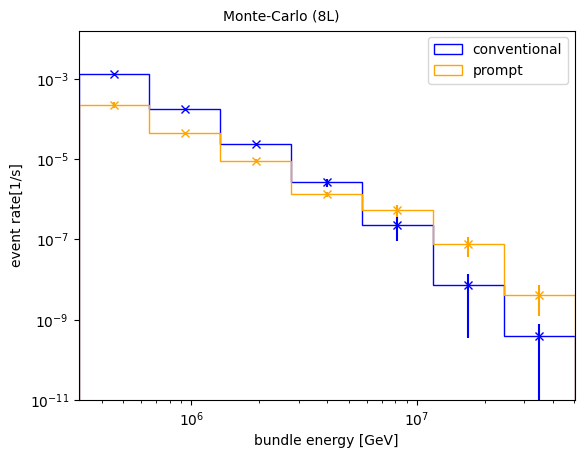

In [ ]:
prompt_conventional_flux_bundle(np.logspace(5.5,7.7,8),bundle_true_cut2_m,bundle_Parent_cut2_m,bundle_weights_cut2_m.simweights_GaisserH3a)
plt.figtext(0.35,0.9,'Monte-Carlo (8L)')
plt.ylim([10**(-11),10**(-1.8)])

(1e-11, 0.015848931924611134)

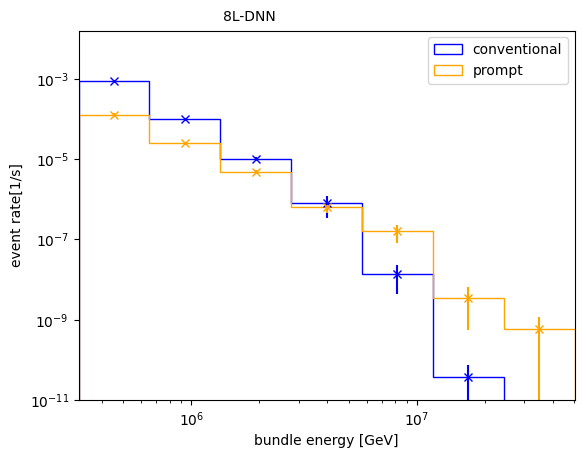

In [ ]:
prompt_conventional_flux_bundle(np.logspace(5.5,7.7,8),bundle_pred_cut2_m,bundle_Parent_cut2_m,bundle_weights_cut2_m.simweights_GaisserH3a)
plt.figtext(0.35,0.9,'8L-DNN')
plt.ylim([10**(-11),10**(-1.8)])

In [ ]:
print(np.size(df_MCLabelsLeading.entry_energy[df_MCLabelsLeading.entry_energy>=10**5])/np.size(df_MCLabelsLeading.entry_energy))
print(np.size(df_DNN_energy.entry_energy[df_DNN_energy.entry_energy>=10**5])/np.size(df_DNN_energy.entry_energy))

0.04270610504932363
0.001472270528427133


In [ ]:
print(np.size(df_DNN_energy.bundle_energy_at_entry[np.abs(df_DNN_energy.bundle_energy_at_entry-df_MCLabelsLeading.bundle_energy_at_entry)/df_DNN_energy.bundle_energy_at_entry<=0.2])/np.size(df_DNN_energy.bundle_energy_at_entry))
print(np.size(df_energy_MuEX.energy[np.abs(df_energy_MuEX.energy-df_MCLabelsLeading.bundle_energy_at_entry)/df_energy_MuEX.energy<=0.2])/np.size(df_energy_MuEX.energy))

0.462508400149792
0.4212386565916168


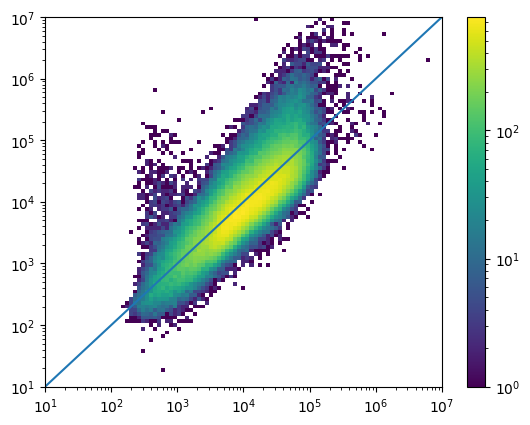

In [ ]:
plt.hist2d(df_DNN_energy.bundle_energy_at_entry*df_DNN_energy.leading_energy_rel_entry,df_MCLabelsLeading.entry_energy,bins=np.logspace(1,7,100),norm='log')
plt.xscale('log')
plt.yscale('log')
plt.plot(bins_entry,bins_entry)
plt.colorbar()

In [ ]:
df_DNN_energy

Run  Event  SubEvent  SubEventStream  exists   
0    300130021      0         0               0       1  \
1    300130021      1         0               0       1   
2    300130021      2         0               0       1   
3    300130021      3         0               0       1   
4    300130021      4         0               0       1   
..         ...    ...       ...             ...     ...   
477  300110164    987         0               0       1   
478  300110164    988         0               0       1   
479  300110164    989         0               0       1   
480  300110164    990         0               0       1   
481  300110164    993         0               0       1   

     bundle_energy_at_entry  bundle_energy_at_entry_log_uncertainty   
0              1.104418e+06                                0.485144  \
1              1.824413e+05                                0.297445   
2              6.296365e+06                                0.254794   
3              2.521519e+04                                0.295481   
4              1.746450e+06                                0.127063   
..                      ...                                     ...   
477            8.197773e+03                                0.340311   
478            1.727223e+04                                0.466602   
479            8.335157e+04                                0.161083   
480            1.592108e+04                                0.241241   
481            3.539469e+05                                0.123855   

      entry_energy  entry_energy_log_uncertainty  leading_energy_rel_entry   
0     63261.542969                      0.967590                  0.067427  \
1     30918.658203                      1.003506                  0.206820   
2    212058.140625                      1.364107                  0.059915   
3      7590.062012                      0.669309                  0.329405   
4    104355.976562                      0.779617                  0.089346   
..             ...                           ...                       ...   
477    3120.156494                      0.675524                  0.439129   
478    4924.513672                      0.755820                  0.330637   
479   10460.733398                      0.710716                  0.171750   
480    3486.715576                      0.622359                  0.256016   
481   23544.472656                      0.766625                  0.086749   

     leading_energy_rel_entry_uncertainty  runtime_prediction   
0                                0.140579            0.057396  \
1                                0.248475            0.057396   
2                                0.191894            0.057396   
3                                0.189313            0.057396   
4                                0.082050            0.057396   
..                                    ...                 ...   
477                              0.212785            0.010374   
478                              0.187460            0.010374   
479                              0.103199            0.010374   
480                              0.146487            0.010735   
481                              0.077488            0.010735   

     runtime_preprocess  runtime_write  
0              0.000792       0.000170  
1              0.001055       0.000062  
2              0.002207       0.000047  
3              0.000649       0.000043  
4              0.002437       0.000044  
..                  ...            ...  
477            0.000324       0.000027  
478            0.000328       0.000028  
479            0.000902       0.000026  
480            0.002607       0.000102  
481            0.002356       0.000040  

[194937 rows x 14 columns]

SignificanceResult(statistic=-0.7514399420843835, pvalue=0.0)


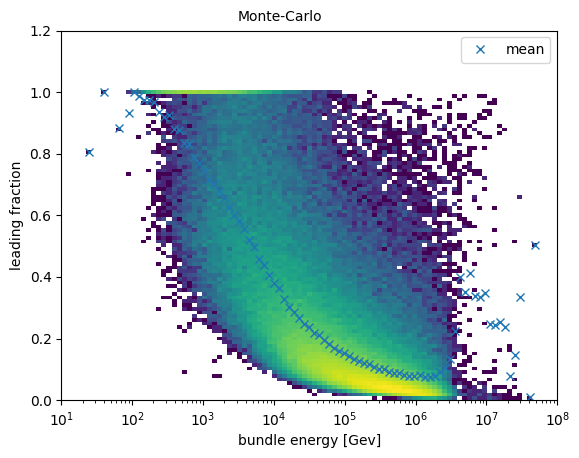

In [ ]:
plt.hist2d(df_MCLabelsLeading.bundle_energy_at_entry,df_MCLabelsLeading.leading_energy_rel_entry,norm='log',bins=[np.logspace(1,8,100),np.linspace(0,1.2,100)],range=[(1,10**8),(0,1.2)])
plt.xscale('log')
mean_rel, bins1, digitized=scp.stats.binned_statistic(df_MCLabelsLeading.bundle_energy_at_entry,df_MCLabelsLeading.leading_energy_rel_entry,bins=np.logspace(1,8,100),statistic=np.nanmean)
plt.plot(mid(np.logspace(1,8,100)),mean_rel,'x',label='mean')
print(scp.stats.spearmanr(df_MCLabelsLeading.bundle_energy_at_entry[np.isfinite(df_MCLabelsLeading.leading_energy_rel_entry)],df_MCLabelsLeading.leading_energy_rel_entry[np.isfinite(df_MCLabelsLeading.leading_energy_rel_entry)]))
plt.figtext(0.4,0.9,'Monte-Carlo')
plt.xlabel('bundle energy [Gev]')
plt.ylabel('leading fraction')
plt.legend()

SignificanceResult(statistic=-0.9622590369917956, pvalue=0.0)


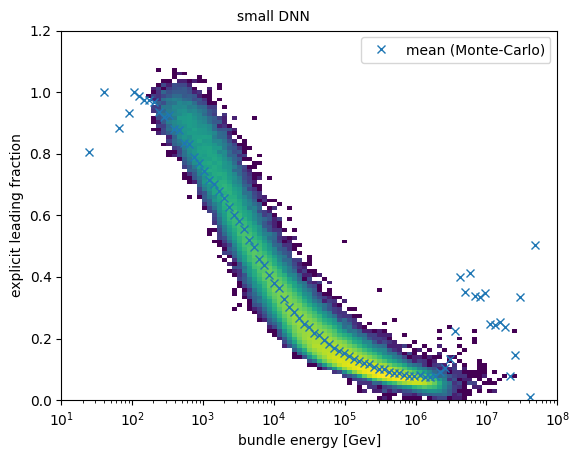

In [ ]:
plt.hist2d(df_DNN_energy.bundle_energy_at_entry,df_DNN_energy.leading_energy_rel_entry,bins=[np.logspace(1,8,100),np.linspace(0,1.2,100)],range=[(1,10**8),(0,1.2)],norm='log')
plt.plot(mid(np.logspace(1,8,100)),mean_rel,'x',label='mean (Monte-Carlo)')
plt.xscale('log')
print(scp.stats.spearmanr(df_DNN_energy.bundle_energy_at_entry,df_DNN_energy.leading_energy_rel_entry))
plt.figtext(0.4,0.9,'small DNN')
plt.xlabel('bundle energy [Gev]')
plt.ylabel('explicit leading fraction')
plt.legend()

SignificanceResult(statistic=-0.9753208968348543, pvalue=0.0)


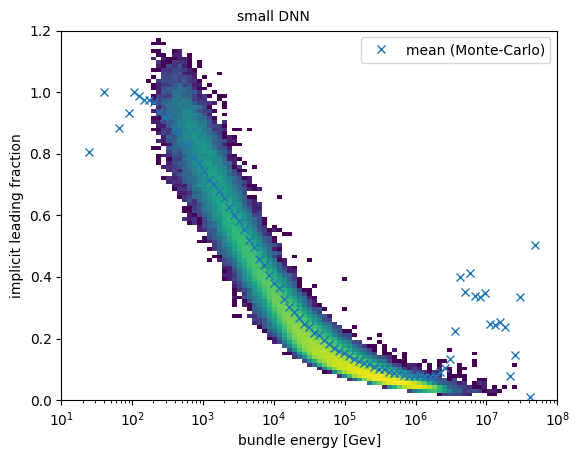

In [ ]:
plt.hist2d(df_DNN_energy.bundle_energy_at_entry,df_DNN_energy.entry_energy/df_DNN_energy.bundle_energy_at_entry,bins=[np.logspace(1,8,100),np.linspace(0,1.2,100)],range=[(1,10**8),(0,1.2)],norm='log')
plt.plot(mid(np.logspace(1,8,100)),mean_rel,'x',label='mean (Monte-Carlo)')
plt.xscale('log')
dings=df_DNN_energy.entry_energy/df_DNN_energy.bundle_energy_at_entry
print(scp.stats.spearmanr(df_DNN_energy.bundle_energy_at_entry,dings))
plt.figtext(0.4,0.9,'small DNN')
plt.xlabel('bundle energy [Gev]')
plt.ylabel('implicit leading fraction')
plt.legend()

In [ ]:
np.any(np.isnan(df_MCLabelsLeading.leading_energy_rel_entry))

True

In [ ]:
np.size(df_DNN_energy.entry_energy[df_DNN_energy.entry_energy>=10**5])/np.size(df_MCLabelsLeading.entry_energy[df_MCLabelsLeading.entry_energy>=10**5])

0.03447447447447447

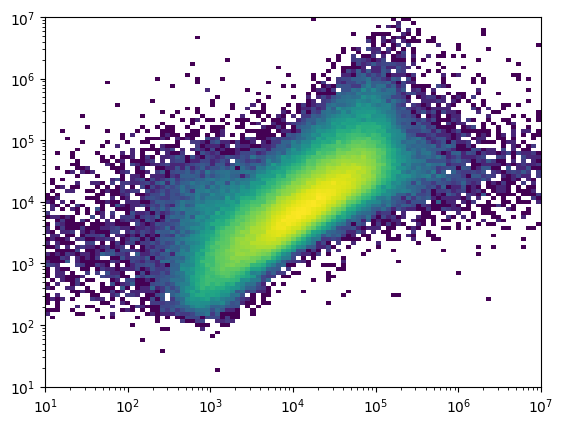

In [ ]:
plt.hist2d(df_energy_MuEX.energy*df_DNN_energy.leading_energy_rel_entry,df_MCLabelsLeading.entry_energy,norm='log',bins=bins_entry)
plt.xscale('log')
plt.yscale('log')

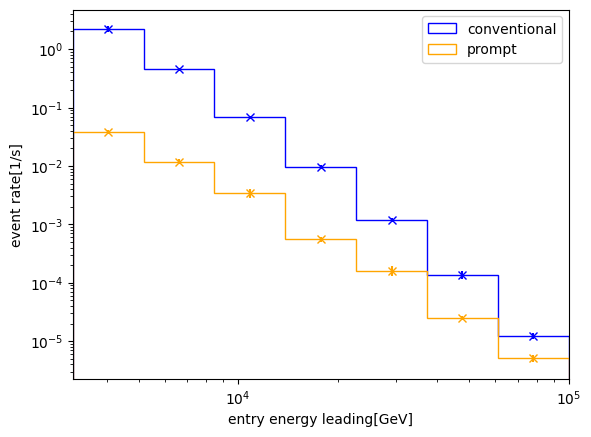

In [ ]:
prompt_conventional_flux_entry(np.logspace(3.5,5,8),df_DNN_energy,df_MCLabelsParent,CorsikaWeightMap.simweights_GaisserH3a)

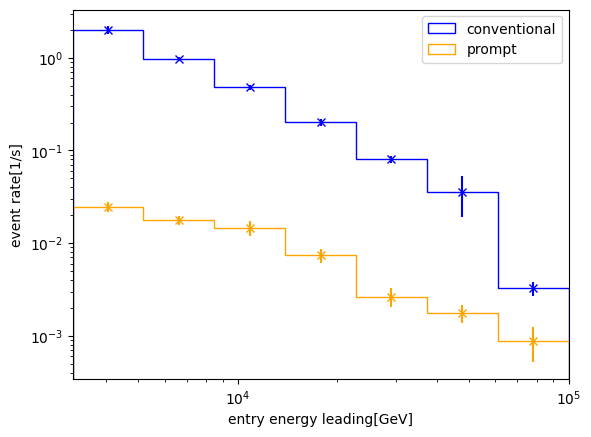

In [ ]:
prompt_conventional_flux_entry(np.logspace(3.5,5,8),df_MCLabelsLeading,df_MCLabelsParent,CorsikaWeightMap.simweights_GaisserH3a)

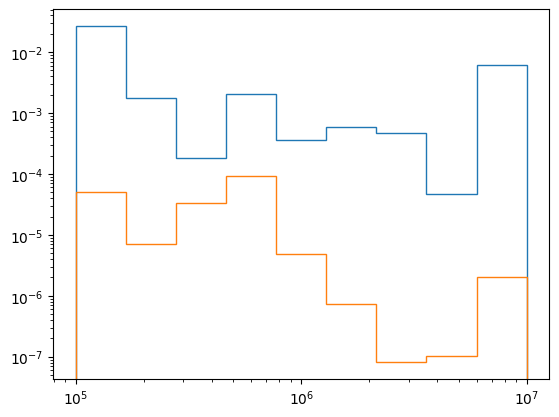

In [ ]:
plt.hist(df_energy_MuEX.energy[df_MCLabelsParent.is_prompt_dennis==0]*df_DNN_energy.leading_energy_rel_entry[df_MCLabelsParent.is_prompt_dennis==0],bins=np.logspace(5,7,10),histtype='step',weights=CorsikaWeightMap.simweights_GaisserH3a[df_MCLabelsParent.is_prompt_dennis==0])
plt.hist(df_energy_MuEX.energy[df_MCLabelsParent.is_prompt_dennis==1]*df_DNN_energy.leading_energy_rel_entry[df_MCLabelsParent.is_prompt_dennis==1],bins=np.logspace(5,7,10),histtype='step',weights=CorsikaWeightMap.simweights_GaisserH3a[df_MCLabelsParent.is_prompt_dennis==1])
plt.xscale('log')
plt.yscale('log')

0.21025688606188503


(0.1, 1.9952623149688795)

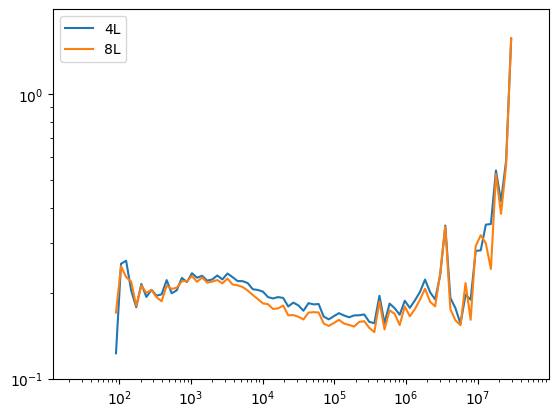

In [ ]:
DNN_s_resolution, bins2, digitized=scp.stats.binned_statistic(df_MCLabelsLeading.bundle_energy_at_entry,np.log10(df_DNN_energy.bundle_energy_at_entry),bins=np.logspace(1,8,100),statistic=np.nanstd)
DNN_m_resolution, bins2, digitized=scp.stats.binned_statistic(df_MCLabelsLeading.bundle_energy_at_entry,np.log10(df_DNN_energy_m.bundle_energy_at_entry),bins=np.logspace(1,8,100),statistic=np.nanstd)
DNN_s_cut_resolution, bins2, digitized=scp.stats.binned_statistic(df_MCLabelsLeading.bundle_energy_at_entry,np.log10(df_DNN_energy_m.bundle_energy_at_entry),bins=np.logspace(1,8,100),statistic=np.nanstd)
plt.plot(mid(np.logspace(1,8,100)),DNN_s_resolution,label='4L')
plt.plot(mid(np.logspace(1,8,100)),DNN_m_resolution,label='8L')
print(np.nanmean(DNN_m_resolution))
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.ylim([10**(-1),10**(0.3)])

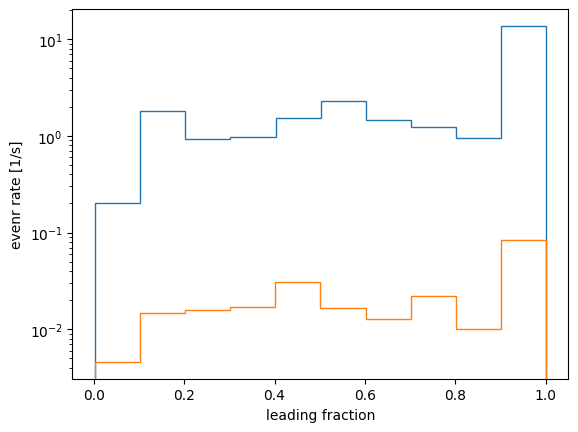

In [ ]:
plt.hist(df_MCLabelsLeading.leading_energy_rel_entry[df_MCLabelsParent.is_prompt_dennis==0],bins=10,weights=CorsikaWeightMap.simweights_GaisserH3a[df_MCLabelsParent.is_prompt_dennis==0],histtype='step',label='conventional')
plt.hist(df_MCLabelsLeading.leading_energy_rel_entry[df_MCLabelsParent.is_prompt_dennis==1],bins=10,weights=CorsikaWeightMap.simweights_GaisserH3a[df_MCLabelsParent.is_prompt_dennis==1],histtype='step',label='prompt')
plt.xlabel('leading fraction')
plt.ylabel('evenr rate [1/s]')
plt.yscale('log')